In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import matplotlib.image as mpimg

In [3]:
data = pd.read_csv('FeatureEng/seller_prd_customer.csv')
data.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,datediff_purchase_deliver
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/17 10:56,10/2/17 11:07,10/4/17 19:55,10/10/17 21:25,10/18/17 0:00,1,...,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4,8 days 00:00:00.000000000
1,1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/17 18:29,8/15/17 20:05,8/17/17 15:28,8/18/17 14:44,8/28/17 0:00,1,...,19.0,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,4,3 days 00:00:00.000000000
2,2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/17 18:24,8/2/17 18:43,8/4/17 17:35,8/7/17 18:30,8/15/17 0:00,1,...,19.0,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,5,5 days 00:00:00.000000000
3,3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,10/23/17 23:26,10/25/17 2:14,10/27/17 16:48,11/7/17 18:04,11/13/17 0:00,1,...,19.0,8.0,13.0,housewares,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,3,15 days 00:00:00.000000000
4,4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,8/10/17 13:35,8/10/17 13:50,8/11/17 13:52,8/16/17 19:03,8/23/17 0:00,1,...,20.0,10.0,15.0,baby,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,5,6 days 00:00:00.000000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109257 entries, 0 to 109256
Data columns (total 32 columns):
Unnamed: 0                       109257 non-null int64
order_id                         109257 non-null object
customer_id                      109257 non-null object
order_status                     109257 non-null object
order_purchase_timestamp         109257 non-null object
order_approved_at                109257 non-null object
order_delivered_carrier_date     109257 non-null object
order_delivered_customer_date    109257 non-null object
order_estimated_delivery_date    109257 non-null object
order_item_id                    109257 non-null int64
product_id                       109257 non-null object
seller_id                        109257 non-null object
shipping_limit_date              109257 non-null object
price                            109257 non-null float64
freight_value                    109257 non-null float64
seller_zip_code_prefix           109257 non-null 

In [5]:
#missing values count
print('missing values count')
print(111023-111009)
print(111023-109868)
print(111023-108637)

print('\nmissing values percentage')
#missing value percentage
print((111023-111009)/111023,'%')
print((111023-109868)/111023,'%')
print((111023-108637)/111023,'%')

missing values count
14
1155
2386

missing values percentage
0.0001260999972978572 %
0.01040324977707322 %
0.02149104239662052 %


In [6]:
data.describe()

,Unnamed: 0,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score
count,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000,109257.000000
mean,55632.291569,1.199383,119.895626,19.971367,24532.898469,48.808799,786.361112,2.207694,2093.695479,30.207108,16.576778,23.037123,35150.443011,4.068115
std,32151.808379,0.710597,181.648777,15.709616,27677.624331,10.007477,651.033900,1.719686,3742.462075,16.155274,13.426778,11.697941,29894.695901,1.357545
min,0.000000,1.000000,0.850000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000
25%,27792.000000,1.000000,39.900000,13.080000,6429.000000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11310.000000,4.000000
50%,55615.000000,1.000000,74.900000,16.280000,13660.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24342.000000,5.000000
75%,83435.000000,1.000000,134.000000,21.150000,28470.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,59064.000000,5.000000
max,111685.000000,21.000000,6735.000000,409.680000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,5.000000


In [7]:
data = data.drop(columns = ['Unnamed: 0'])

In [8]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,datediff_purchase_deliver
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/17 10:56,10/2/17 11:07,10/4/17 19:55,10/10/17 21:25,10/18/17 0:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4,8 days 00:00:00.000000000
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/17 18:29,8/15/17 20:05,8/17/17 15:28,8/18/17 14:44,8/28/17 0:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,4,3 days 00:00:00.000000000
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/17 18:24,8/2/17 18:43,8/4/17 17:35,8/7/17 18:30,8/15/17 0:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,5,5 days 00:00:00.000000000
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,10/23/17 23:26,10/25/17 2:14,10/27/17 16:48,11/7/17 18:04,11/13/17 0:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,housewares,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,3,15 days 00:00:00.000000000
4,8736140c61ea584cb4250074756d8f3b,ab8844663ae049fda8baf15fc928f47f,delivered,8/10/17 13:35,8/10/17 13:50,8/11/17 13:52,8/16/17 19:03,8/23/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,20.0,10.0,15.0,baby,02c9e0c05a817d4562ec0e8c90f29dba,8577,itaquaquecetuba,SP,5,6 days 00:00:00.000000000


In [9]:
data.order_status.unique()

array(['delivered'], dtype=object)

In [10]:
data['order_status'].value_counts()

delivered    109257
Name: order_status, dtype: int64

In [11]:
len(data.order_id.unique())

95104

In [12]:
data['order_id'].value_counts().head(50)

5a3b1c29a49756e75f1ef513383c0c12    22
8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
73c8ab38f07dc94389065f7eba4f297a    14
9bdc4d4c71aa1de4606060929dee888c    14
37ee401157a3a0b28c9c6d0ed8c3b24b    13
c05d6a79e55da72ca780ce90364abed9    12
637617b3ffe9e2f7a2411243829226d0    12
aef2bc3845eb581cecce74b769d46c6a    12
af822dacd6f5cff7376413c03a388bb7    12
78cf5dc2baadfbac2c47c6ef7c2a2282    12
2c2a19b5703863c908512d135aa6accc    12
3a213fcdfe7d98be74ea0dc05a8b31ae    12
7f2c22c54cbae55091a09a9653fd2b8a    11
71dab1155600756af6de79de92e712e3    11
6c355e2913545fa6f72c40cbca57729e    11
e8fa22c3673b1dd17ea315021b1f0f61    10
30bdf3d824d824610a49887486debcaf    10
f80549a97eb203e1566e026ab66f045b    10
9aec4e1ae90b23c7bf2d2b3bfafbd943    10
a483ffe0ce133740ab12ebcba8a3ccf9    10
ca3625898fbd48669d50701aba51cd5f    10
f60ce04ff8060152c83c7c97e

In [13]:
data['customer_id'].value_counts().head(50)

be1c4e52bb71e0c54b11a26b8e8d59f2    22
fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
be1b70680b9f9694d8c70f41fa3dc92b    20
adb32467ecc74b53576d9d13a5a55891    15
10de381f8a8d23fff822753305f71cae    15
a7693fba2ff9583c78751f2b66ecab9d    14
d5f2b3f597c7ccafbb5cac0bcc3d6024    14
7d321bd4e8ba1caf74c4c1aabd9ae524    13
3b54b5978e9ace64a63f90d176ffb158    12
bdced1e75dafe66bd70dc84af644bca7    12
daf15f1b940cc6a72ba558f093dc00dd    12
91f92cfee46b79581b05aa974dd57ce5    12
0d93f21f3e8543a9d0d8ece01561f5b2    12
48d6a6909a9bd0b2128ea79630e52d13    12
9eb3d566e87289dcb0acf28e1407c839    12
f4c13379ddd0ed4f4fc1c0b49c2c5e51    11
d95ca02ab50105ccce682bdf9ffdc3b4    11
8c20d9bfbc96c5d39025d77a3ba83d7f    11
4a60b2ce1ee8c7b828e4bbcca5b86b41    10
e2f063c52fa92b54f186c62b90699c10    10
78fc46047c4a639e81ff65f0396e02fe    10
d6646ea91d8cd9fc7e6882a7068779d4    10
1ff773612ab8934db89fd5afa8afe506    10
e7d6802668de6e74d0d6c56565bf2a24    10
0d861a5e4dd6a9079d89e1330

In [14]:
data.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6, 11,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [15]:
data['order_item_id'].value_counts()

1     95606
2      9575
3      2234
4       936
5       439
6       250
7        59
8        36
9        29
10       26
11       18
12       13
13        8
14        7
15        5
20        3
16        3
17        3
18        3
19        3
21        1
Name: order_item_id, dtype: int64

In [16]:
product_cat = list(data.product_category_name_english.unique())
product_cat

['housewares',
 'baby',
 'cool_stuff',
 'sports_leisure',
 'toys',
 'furniture_decor',
 'perfumery',
 'health_beauty',
 'pet_shop',
 'music',
 'auto',
 'watches_gifts',
 'audio',
 'computers_accessories',
 'electronics',
 'food',
 'telephony',
 'consoles_games',
 'stationery',
 'bed_bath_table',
 'signaling_and_security',
 'party_supplies',
 'fashion_male_clothing',
 'fashio_female_clothing',
 'costruction_tools_tools',
 'fashion_bags_accessories',
 'garden_tools',
 'office_furniture',
 'industry_commerce_and_business',
 'furniture_living_room',
 'construction_tools_construction',
 'market_place',
 'home_confort',
 'art',
 'home_construction',
 'costruction_tools_garden',
 'small_appliances',
 'cine_photo',
 'furniture_bedroom',
 'fixed_telephony',
 'musical_instruments',
 'air_conditioning',
 'luggage_accessories',
 'fashion_sport',
 'home_appliances',
 'small_appliances_home_oven_and_coffee',
 'construction_tools_lights',
 'books_technical',
 'kitchen_dining_laundry_garden_furniture'

In [17]:
data.product_category_name_english.value_counts()

bed_bath_table                           11108
health_beauty                             9520
sports_leisure                            8487
furniture_decor                           8236
computers_accessories                     7708
housewares                                6819
watches_gifts                             5867
telephony                                 4432
garden_tools                              4281
auto                                      4157
toys                                      4037
cool_stuff                                3724
perfumery                                 3355
baby                                      2989
electronics                               2731
stationery                                2474
fashion_bags_accessories                  2004
pet_shop                                  1926
office_furniture                          1678
consoles_games                            1090
luggage_accessories                       1077
construction_

In [18]:
data['customer_city'].value_counts()

sao paulo                 17239
rio de janeiro             7512
belo horizonte             3058
brasilia                   2336
curitiba                   1717
campinas                   1613
porto alegre               1557
salvador                   1342
guarulhos                  1280
sao bernardo do campo      1030
niteroi                     959
santo andre                 869
osasco                      831
santos                      807
goiania                     768
sao jose dos campos         745
fortaleza                   686
sorocaba                    686
recife                      651
florianopolis               641
jundiai                     629
ribeirao preto              574
nova iguacu                 479
contagem                    471
belem                       469
juiz de fora                467
barueri                     463
mogi das cruzes             434
sao goncalo                 417
vitoria                     417
                          ...  
cezarina

In [19]:
data['customer_state'].value_counts()

SP    46067
RJ    14005
MG    12809
RS     6082
PR     5596
SC     4052
BA     3644
DF     2349
GO     2244
ES     2218
PE     1736
CE     1414
PA     1043
MT     1028
MS      814
MA      795
PB      578
PI      517
RN      517
AL      427
SE      373
TO      306
RO      267
AM      162
AC       89
AP       81
RR       44
Name: customer_state, dtype: int64

In [20]:
len(data.seller_id.unique())

2912

In [21]:
list_count = data['seller_id'].value_counts()
list_count

6560211a19b47992c3666cc44a7e94c0    2002
4a3ca9315b744ce9f8e9374361493884    1971
1f50f920176fa81dab994f9023523100    1935
cc419e0650a3c5ba77189a1882b7556a    1759
da8622b14eb17ae2831f4ac5b9dab84a    1571
955fee9216a65b617aa5c0531780ce60    1474
1025f0e2d44d7041d6cf58b6550e0bfa    1434
7c67e1448b00f6e969d365cea6b010ab    1366
ea8482cd71df3c1969d7b9473ff13abc    1188
7a67c85e85bb2ce8582c35f2203ad736    1156
4869f7a5dfa277a7dca6462dcf3b52b2    1148
3d871de0142ce09b7081e2b9d1733cb1    1132
8b321bb669392f5163d04c59e235e066    1005
cca3071e3e9bb7d12640c9fbe2301306     833
620c87c171fb2a6dd6e8bb4dec959fc6     784
a1043bafd471dff536d0c462352beb48     752
e9779976487b77c6d4ac45f75ec7afe9     739
f8db351d8c4c4c22c6835c19a46f01b0     713
d2374cbcbb3ca4ab1086534108cc3ab7     647
391fc6631aebcf3004804e51b40bcf1e     618
fa1c13f2614d7b5c4749cbc52fecda94     579
7d13fca15225358621be4086e1eb0964     571
d91fb3b7d041e83b64a00a3edfb37e4f     554
128639473a139ac0f3e5f5ade55873a5     554
1835b56ce799e6a4

In [22]:
from collections import Counter

#print(list_count.head(197))
count = Counter()
for i in list_count:
    count[i]+=1
    
print(sorted(count.items(), key=lambda pair: pair[1]))
list_names = data['seller_id'].value_counts()>=120
seller_id_final = list_names.keys()
seller_id_final = seller_id_final[:196]
print(seller_id_final)

[(2002, 1), (1971, 1), (1935, 1), (1759, 1), (1571, 1), (1474, 1), (1434, 1), (1366, 1), (1188, 1), (1156, 1), (1148, 1), (1132, 1), (1005, 1), (833, 1), (784, 1), (752, 1), (739, 1), (713, 1), (647, 1), (618, 1), (579, 1), (571, 1), (553, 1), (526, 1), (515, 1), (513, 1), (485, 1), (432, 1), (429, 1), (421, 1), (418, 1), (414, 1), (403, 1), (400, 1), (391, 1), (384, 1), (377, 1), (350, 1), (344, 1), (343, 1), (342, 1), (338, 1), (336, 1), (335, 1), (333, 1), (330, 1), (326, 1), (324, 1), (323, 1), (322, 1), (314, 1), (313, 1), (309, 1), (305, 1), (282, 1), (270, 1), (266, 1), (265, 1), (264, 1), (250, 1), (249, 1), (248, 1), (243, 1), (239, 1), (238, 1), (237, 1), (234, 1), (231, 1), (230, 1), (228, 1), (223, 1), (221, 1), (220, 1), (219, 1), (210, 1), (203, 1), (197, 1), (193, 1), (192, 1), (190, 1), (187, 1), (186, 1), (180, 1), (179, 1), (177, 1), (175, 1), (169, 1), (168, 1), (167, 1), (166, 1), (163, 1), (162, 1), (160, 1), (157, 1), (149, 1), (148, 1), (146, 1), (144, 1), (139, 

In [23]:
data_new = data.loc[data['seller_id'].isin(seller_id_final)]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64541 entries, 9 to 97311
Data columns (total 31 columns):
order_id                         64541 non-null object
customer_id                      64541 non-null object
order_status                     64541 non-null object
order_purchase_timestamp         64541 non-null object
order_approved_at                64541 non-null object
order_delivered_carrier_date     64541 non-null object
order_delivered_customer_date    64541 non-null object
order_estimated_delivery_date    64541 non-null object
order_item_id                    64541 non-null int64
product_id                       64541 non-null object
seller_id                        64541 non-null object
shipping_limit_date              64541 non-null object
price                            64541 non-null float64
freight_value                    64541 non-null float64
seller_zip_code_prefix           64541 non-null int64
seller_city                      64541 non-null object
seller_stat

In [24]:
data_seller = data_new.groupby('seller_id')['product_category_name_english'].value_counts()
data_seller_df = pd.DataFrame(data=data_seller)
column = ['seller_id','product_category','sales/category per seller']
data_seller_df.rename(columns={'seller_id':'seller_id','product_category_name_english':'product_category','product_category_name_english':'sales/category per seller'},inplace=True)
data_seller_df.head(50)

sales/category per seller
seller_id                        product_category_name_english                               
001cca7ae9ae17fb1caed9dfb1094831 garden_tools                                             207
                                 construction_tools_construction                           27
004c9cd9d87a3c30c522c48c4fc07416 bed_bath_table                                           162
00ee68308b45bc5e2660cd833c3f81cc bed_bath_table                                           151
                                 furniture_mattress_and_upholstery                         22
00fc707aaaad2d31347cf883cd2dfe10 computers_accessories                                    143
01fdefa7697d26ad920e9e0346d4bd1b health_beauty                                            130
0241d4d5d36f10f80c644447315af0bd furniture_decor                                          249
06a2c3af7b3aee5d69171b0e14f0ee87 health_beauty                                            403
080102cd0a76b09e0dcf55fcacc60e05 computers_accessories                                     94
                                 consoles_games                                            28
                                 home_appliances                                            4
                                 electronics                                                1
                                 toys                                                       1
0adac9fbd9a2b63cccaac4f8756c1ca8 housewares                                               107
                                 home_appliances                                           10
                                 furniture_decor                                            9
                                 market_place                                               8
                                 stationery                                                 1
0b90b6df587eb83608a64ea8b390cf07 computers_accessories                                    214
0bae85eb84b9fb3bd773911e89288d54 housewares                                                77
                                 toys                                                      36
                                 stationery                                                 7
                                 sports_leisure                                             6
                                 art                                                        4
                                 bed_bath_table                                             3
                                 health_beauty                                              3
                                 audio                                                      2
                                 furniture_decor                                            2
                                 watches_gifts                                              2
                                 baby                                                       1
                                 garden_tools                                               1
                                 home_construction                                          1
0be8ff43f22e456b4e0371b2245e4d01 sports_leisure                                            68
                                 luggage_accessories                                       31
                                 housewares                                                25
                                 bed_bath_table                                            11
                                 stationery                                                10
                                 toys                                                       9
                                 computers_accessories                                      6
                                 fashion_sport                                              5
                          

In [25]:
data_new.groupby('seller_id')['product_category_name_english'].value_counts().sort_values(ascending=False).head(20)

seller_id                         product_category_name_english
1f50f920176fa81dab994f9023523100  garden_tools                     1886
6560211a19b47992c3666cc44a7e94c0  watches_gifts                    1600
4a3ca9315b744ce9f8e9374361493884  bed_bath_table                   1559
da8622b14eb17ae2831f4ac5b9dab84a  bed_bath_table                   1297
1025f0e2d44d7041d6cf58b6550e0bfa  furniture_decor                  1297
7c67e1448b00f6e969d365cea6b010ab  office_furniture                 1234
ea8482cd71df3c1969d7b9473ff13abc  telephony                        1163
cc419e0650a3c5ba77189a1882b7556a  health_beauty                    1086
7a67c85e85bb2ce8582c35f2203ad736  cool_stuff                       1055
4869f7a5dfa277a7dca6462dcf3b52b2  watches_gifts                     995
8b321bb669392f5163d04c59e235e066  electronics                       898
3d871de0142ce09b7081e2b9d1733cb1  stationery                        824
cc419e0650a3c5ba77189a1882b7556a  perfumery                         646


In [26]:
#selected_sellers=data_new.groupby('seller_id')['product_category_name_english'].value_counts().sort_values(ascending=False).head(20).to_frame()
#print(selected_sellers.reindex())

### Performing EDA on Sellers Hence collecting sellers who have made high sales

selected_sellers_grp=data_new.groupby(['seller_id','product_category_name_english']).size().sort_values(ascending=False).head(20).to_frame()
list_of_Sellers=(selected_sellers_grp.reset_index()['seller_id'])
list_of_Prod=(selected_sellers_grp.reset_index()['product_category_name_english'])


In [27]:
# Trying to split data based on year as well as month
data_new['transaction_year'] = pd.DatetimeIndex(data_new['order_purchase_timestamp']).year
data_new['transaction_month'] = pd.DatetimeIndex(data_new['order_purchase_timestamp']).month
data_new['transaction_date'] = pd.DatetimeIndex(data_new['order_purchase_timestamp']).day
data_new['Bi-Weekly'] = np.where(data_new['transaction_date']<15,1,0)
#data_new['Bi-Weekly'] = data_new['transaction_month'].astype(str)  + '_' + data_new['Bi-Weekly']

data_new['Bi-Weekly']= (2*data_new['transaction_month']-1) - data_new['Bi-Weekly']
#data_new[data_new['transaction_date'] < 15,"Bi-Weekly"] = 0
#data_new[data_new['transaction_date'] >= 15,"Bi-Weekly"] = 1
data_new.head(40)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,datediff_purchase_deliver,transaction_year,transaction_month,transaction_date,Bi-Weekly
9,234e664f4418bb97ea8f387244a9538f,98e164b3750e0b9e0eddb3612fb8d617,delivered,5/22/17 12:59,5/22/17 13:15,5/24/17 9:34,5/26/17 14:41,6/2/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,de166e0e5846bcc902deba22ef24bd77,4757,sao paulo,SP,5,4 days 00:00:00.000000000,2017,5,22,9
10,fd54e2afe76bb472b26d47b2aea174d5,ce3e4ad9d1fd077a56f53f547205b1a7,delivered,7/13/17 9:42,7/13/17 9:55,7/14/17 16:25,7/17/17 18:17,8/4/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,3788240ca725fbd60d785d4b888b8adb,83602,campo largo,PR,5,4 days 00:00:00.000000000,2017,7,13,12
11,3a93b4a83b7cfce5720745425c43a856,53859b5bd7c22aaae15b7482acfa1bc8,delivered,7/10/17 10:51,7/12/17 2:24,7/14/17 16:37,7/18/17 16:52,7/25/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,d9e383531c1acbe6239248fcd5045f92,18090,sorocaba,SP,4,8 days 00:00:00.000000000,2017,7,10,12
12,c8b8a114e6f6e79082614222a75d0353,53b13fa2d20d9011a49a2751c95433a9,delivered,6/1/17 12:46,6/3/17 2:22,6/6/17 13:48,6/13/17 9:17,6/22/17 0:00,1,b00a32a0b42fd65efb58a5822009f629,...,61439e840fe1e7216ada4f256239967c,18125,aluminio,SP,1,12 days 00:00:00.000000000,2017,6,1,10
27,7badee5c2f143381b7002bfbba9037b8,7a95f1b494f0062025b63b3193421690,delivered,6/14/17 13:40,6/15/17 3:10,6/16/17 14:38,6/22/17 17:33,7/7/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,279d9065b859d2c9caf96ce8b2d0c929,84061,ponta grossa,PR,5,8 days 00:00:00.000000000,2017,6,14,10
28,bffb2f663c0ea51622bccd351e2815d8,b3dad37a7ed6c67056ababa4a4deff4d,delivered,5/19/17 13:06,5/19/17 13:22,5/22/17 10:16,5/23/17 12:42,6/1/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,d0886880ad8e1bb53c74aa0923b0d0cb,6170,osasco,SP,5,4 days 00:00:00.000000000,2017,5,19,9
29,ebb8082fe1a85f69ce8b2f708d07a910,eacf8d981b61b119a75afa34a977b271,delivered,5/22/17 12:06,5/22/17 13:05,5/24/17 9:34,5/31/17 12:31,6/13/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,5491dee0f317e6d8d4dc76ece4eeeb73,31230,belo horizonte,MG,5,9 days 00:00:00.000000000,2017,5,22,9
30,56dcbf1c8f148732f46bb1770568aa5d,3a6d58dbca99e1b8ef6177a10d451ac5,delivered,5/19/17 16:16,5/19/17 16:25,5/24/17 7:36,6/2/17 16:33,6/23/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,d7f925384467e3c256086de7392ac08b,60871,fortaleza,CE,1,14 days 00:00:00.000000000,2017,5,19,9
31,106f6c512adbf8efc43791f75692d25c,ad63c8822d109e745e032497a5fffd68,delivered,5/17/17 12:16,5/17/17 13:05,5/18/17 9:46,5/23/17 10:24,6/6/17 0:00,1,725cbfcaff95a4d43742fdf13cf43c75,...,ff70aa1b53f643263ead50eed3166164,13574,sao carlos,SP,4,6 days 00:00:00.000000000,2017,5,17,9
49,bacc701eec298cb5520f251e863cde03,ca559371b1efa6b4733abba1c71494c9,delivered,6/1/17 10:48,6/1/17 11:03,6/2/17 9:19,6/9/17 18:42,6/26/17 0:00,1,5a419dbf24a8c9718fe522b81c69f61a,...,3ef848190859d1383be83ef97ae6fedd,31310,belo horizonte,MG,5,8 days 00:00:00.000000000,2017,6,1,10


In [28]:
# EDA
#From above group by seller "1f50f920176fa81dab994f9023523100" has highest number of sales.Lets try exploring for the factor affecting that sale
highest_sale_seller=data_new[(data_new['seller_id'] == '1f50f920176fa81dab994f9023523100')]
highest_sale_seller.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,datediff_purchase_deliver,transaction_year,transaction_month,transaction_date,Bi-Weekly
6240,78e669f43077eded2d55ba9455560995,38955481fd51ffe551f17d2efdeaf43b,delivered,8/5/18 15:42,8/5/18 15:50,8/6/18 15:43,8/15/18 15:12,8/24/18 0:00,3,422879e10f46682990de24d770e7f83d,...,f31ac54af6af7097bddd1053011e7a3a,96065,pelotas,RS,5,10 days 00:00:00.000000000,2018,8,5,14
6241,78e669f43077eded2d55ba9455560995,38955481fd51ffe551f17d2efdeaf43b,delivered,8/5/18 15:42,8/5/18 15:50,8/6/18 15:43,8/15/18 15:12,8/24/18 0:00,4,0bcc3eeca39e1064258aa1e932269894,...,f31ac54af6af7097bddd1053011e7a3a,96065,pelotas,RS,5,10 days 00:00:00.000000000,2018,8,5,14
13708,9eedca0abb31d377cd420b89775a64a8,aae6057b8281efa34faf1d9cd3f7cbc7,delivered,11/28/17 13:58,11/29/17 2:23,11/29/17 23:38,12/8/17 23:28,12/21/17 0:00,1,368c6c730842d78016ad823897a372db,...,d92e065f815b20aa0535f71f00efb6a9,11628,sao sebastiao,SP,1,10 days 00:00:00.000000000,2017,11,28,21
13709,9eedca0abb31d377cd420b89775a64a8,aae6057b8281efa34faf1d9cd3f7cbc7,delivered,11/28/17 13:58,11/29/17 2:23,11/29/17 23:38,12/8/17 23:28,12/21/17 0:00,3,368c6c730842d78016ad823897a372db,...,d92e065f815b20aa0535f71f00efb6a9,11628,sao sebastiao,SP,1,10 days 00:00:00.000000000,2017,11,28,21
13710,9eedca0abb31d377cd420b89775a64a8,aae6057b8281efa34faf1d9cd3f7cbc7,delivered,11/28/17 13:58,11/29/17 2:23,11/29/17 23:38,12/8/17 23:28,12/21/17 0:00,4,368c6c730842d78016ad823897a372db,...,d92e065f815b20aa0535f71f00efb6a9,11628,sao sebastiao,SP,1,10 days 00:00:00.000000000,2017,11,28,21


In [29]:
highest_sale_seller_count=highest_sale_seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
print(highest_sale_seller_count)


   product_category_name_english  transaction_year  transaction_month  count
0                           baby              2018                  3      1
1                           baby              2018                  4     23
2                           baby              2018                  5      7
3                           baby              2018                  6      2
4                           baby              2018                  7      3
5                           baby              2018                  8      6
6                   garden_tools              2017                  4      9
7                   garden_tools              2017                  5     17
8                   garden_tools              2017                  6     13
9                   garden_tools              2017                  7     84
10                  garden_tools              2017                  8    136
11                  garden_tools              2017                  9    127

In [30]:
## Bi-Weekly Data

highest_sale_seller_count_weekly=highest_sale_seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
print(highest_sale_seller_count_weekly)

   product_category_name_english  transaction_year  Bi-Weekly  count
0                           baby              2018          5      1
1                           baby              2018          6      3
2                           baby              2018          7     20
3                           baby              2018          8      4
4                           baby              2018          9      3
5                           baby              2018         10      1
6                           baby              2018         11      1
7                           baby              2018         13      3
8                           baby              2018         14      3
9                           baby              2018         15      3
10                  garden_tools              2017          6      7
11                  garden_tools              2017          7      2
12                  garden_tools              2017          8     13
13                  garden_tools  

Text(0,0.5,'Count of Product sold')

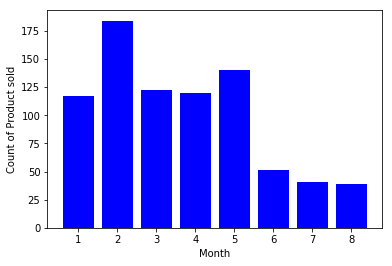

In [31]:
#graph for 2018

month=(highest_sale_seller_count[(highest_sale_seller_count['transaction_year']==2018) & (highest_sale_seller_count['product_category_name_english']=='garden_tools')]['transaction_month'])
count=(highest_sale_seller_count[(highest_sale_seller_count['transaction_year']==2018) & (highest_sale_seller_count['product_category_name_english']=='garden_tools')]['count'])
plt.bar(month, count, color="blue")
plt.xlabel('Month')
plt.ylabel('Count of Product sold')

Text(0,0.5,'Count of Product sold')

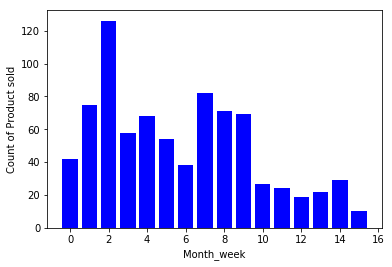

In [32]:
# graph for 2018 Bi-Weekly

month=(highest_sale_seller_count_weekly[(highest_sale_seller_count_weekly['transaction_year']==2018) & (highest_sale_seller_count_weekly['product_category_name_english']=='garden_tools')]['Bi-Weekly'])
count=(highest_sale_seller_count_weekly[(highest_sale_seller_count_weekly['transaction_year']==2018) & (highest_sale_seller_count_weekly['product_category_name_english']=='garden_tools')]['count'])
plt.bar(month, count, color="blue")
plt.xlabel('Month_week')
plt.ylabel('Count of Product sold')

Text(0,0.5,'Count of Product sold')

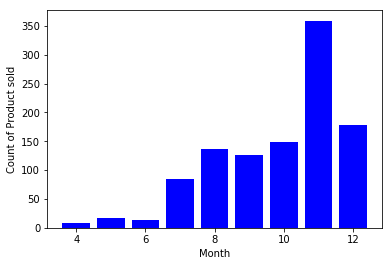

In [33]:

#graph for 2017

highest_sale_seller_count=highest_sale_seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
month=(highest_sale_seller_count[(highest_sale_seller_count['transaction_year']==2017) & (highest_sale_seller_count['product_category_name_english']=='garden_tools')]['transaction_month'])
count=(highest_sale_seller_count[(highest_sale_seller_count['transaction_year']==2017) & (highest_sale_seller_count['product_category_name_english']=='garden_tools')]['count'])
plt.bar(month, count, color="blue")
plt.xlabel('Month')
plt.ylabel('Count of Product sold')

Text(0,0.5,'Count of Product sold')

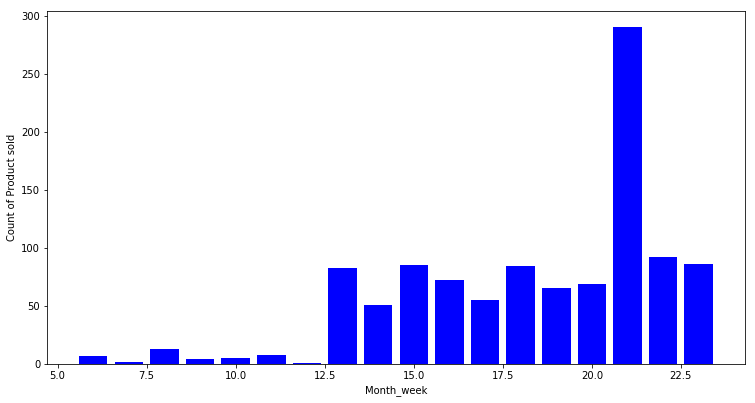

In [34]:
# graph for 2017 Bi-Weekly

month=(highest_sale_seller_count_weekly[(highest_sale_seller_count_weekly['transaction_year']==2017) & (highest_sale_seller_count_weekly['product_category_name_english']=='garden_tools')]['Bi-Weekly'])
count=(highest_sale_seller_count_weekly[(highest_sale_seller_count_weekly['transaction_year']==2017) & (highest_sale_seller_count_weekly['product_category_name_english']=='garden_tools')]['count'])
fig = plt.gcf()
fig.set_size_inches(12.5, 6.5)
plt.bar(month, count, color="blue")
plt.xlabel('Month_week')
plt.ylabel('Count of Product sold')

In [35]:
# Try taking count of product categories sold in monthly sales

data_new_count=data_new.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
print(data_new_count.head(30))

   product_category_name_english  transaction_year  transaction_month  count
0     agro_industry_and_commerce              2017                  1      3
1     agro_industry_and_commerce              2017                  2      6
2     agro_industry_and_commerce              2017                  3      2
3     agro_industry_and_commerce              2017                  5      2
4     agro_industry_and_commerce              2017                  8      4
5     agro_industry_and_commerce              2017                 10      1
6     agro_industry_and_commerce              2018                  1      1
7     agro_industry_and_commerce              2018                  2      1
8     agro_industry_and_commerce              2018                  3     10
9     agro_industry_and_commerce              2018                  5      1
10    agro_industry_and_commerce              2018                  7      3
11    agro_industry_and_commerce              2018                  8      1

In [36]:
# Try taking count of product categories sold in Bi-Weekly sales

data_new_count_weekly=data_new.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
print(data_new_count_weekly.head(30))

   product_category_name_english  transaction_year  Bi-Weekly  count
0     agro_industry_and_commerce              2017          1      3
1     agro_industry_and_commerce              2017          2      3
2     agro_industry_and_commerce              2017          3      3
3     agro_industry_and_commerce              2017          5      2
4     agro_industry_and_commerce              2017          8      1
5     agro_industry_and_commerce              2017          9      1
6     agro_industry_and_commerce              2017         15      4
7     agro_industry_and_commerce              2017         18      1
8     agro_industry_and_commerce              2018          1      1
9     agro_industry_and_commerce              2018          2      1
10    agro_industry_and_commerce              2018          4      3
11    agro_industry_and_commerce              2018          5      7
12    agro_industry_and_commerce              2018          8      1
13    agro_industry_and_commerce  

In [37]:
list_of_prod_cat=list(data_new_count.product_category_name_english.unique())
print(list_of_prod_cat)

['agro_industry_and_commerce', 'air_conditioning', 'art', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fixed_telephony', 'food', 'food_drink', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_2', 'home_confort', 'home_construction', 'housewares', 'industry_commerce_and_business', 'kitchen_dining_laundry_garden_furniture', 'luggage_accessories', 'market_place', 'music', 'mu

In [38]:
list_of_prod_cat_weekly=list(data_new_count_weekly.product_category_name_english.unique())
print(list_of_prod_cat_weekly)

['agro_industry_and_commerce', 'air_conditioning', 'art', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fixed_telephony', 'food', 'food_drink', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_appliances_2', 'home_comfort_2', 'home_confort', 'home_construction', 'housewares', 'industry_commerce_and_business', 'kitchen_dining_laundry_garden_furniture', 'luggage_accessories', 'market_place', 'music', 'mu

In [39]:
data_new_count[(data_new_count['product_category_name_english']==list_of_prod_cat[0])]

,product_category_name_english,transaction_year,transaction_month,count
0,agro_industry_and_commerce,2017,1,3
1,agro_industry_and_commerce,2017,2,6
2,agro_industry_and_commerce,2017,3,2
3,agro_industry_and_commerce,2017,5,2
4,agro_industry_and_commerce,2017,8,4
5,agro_industry_and_commerce,2017,10,1
6,agro_industry_and_commerce,2018,1,1
7,agro_industry_and_commerce,2018,2,1
8,agro_industry_and_commerce,2018,3,10
9,agro_industry_and_commerce,2018,5,1


In [40]:
data_new_count_weekly[(data_new_count_weekly['product_category_name_english']==list_of_prod_cat[0])]

,product_category_name_english,transaction_year,Bi-Weekly,count
0,agro_industry_and_commerce,2017,1,3
1,agro_industry_and_commerce,2017,2,3
2,agro_industry_and_commerce,2017,3,3
3,agro_industry_and_commerce,2017,5,2
4,agro_industry_and_commerce,2017,8,1
5,agro_industry_and_commerce,2017,9,1
6,agro_industry_and_commerce,2017,15,4
7,agro_industry_and_commerce,2017,18,1
8,agro_industry_and_commerce,2018,1,1
9,agro_industry_and_commerce,2018,2,1


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


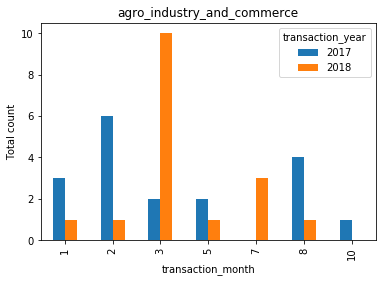

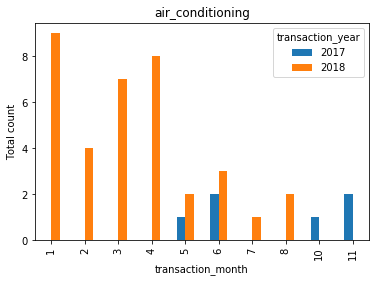

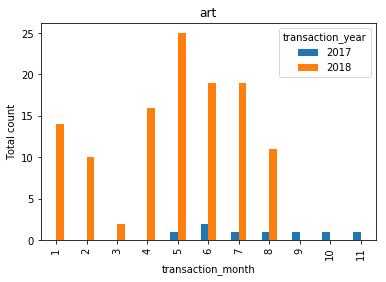

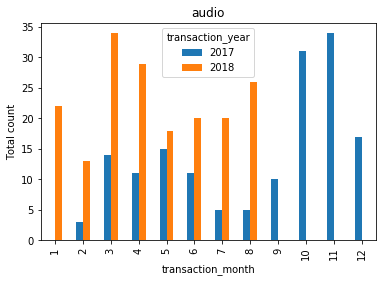

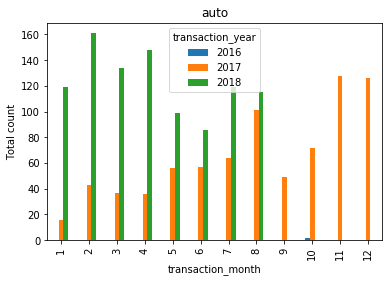

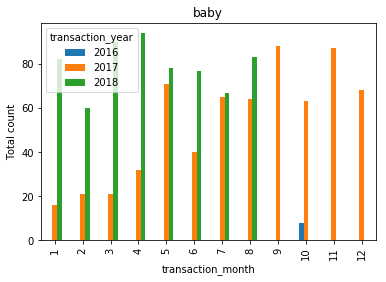

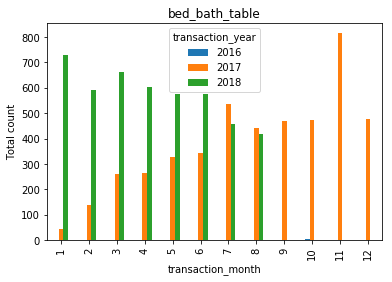

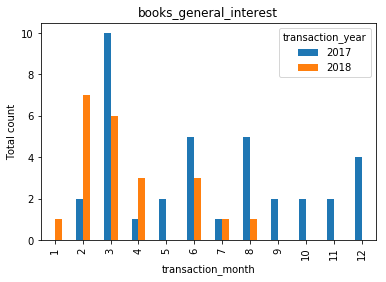

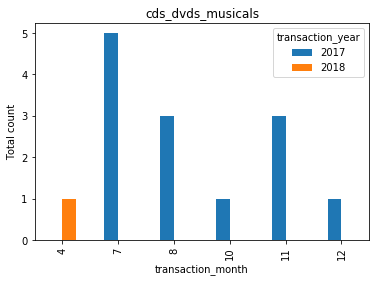

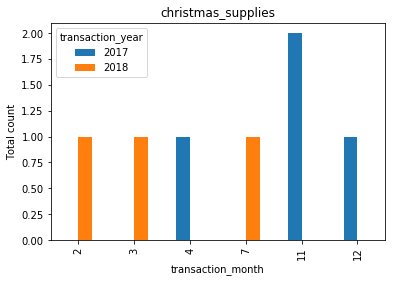

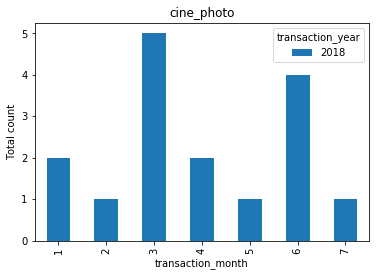

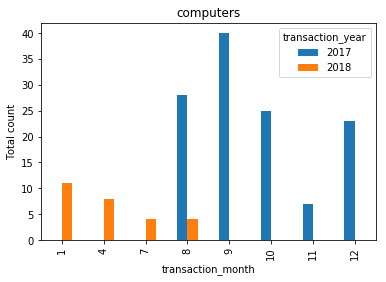

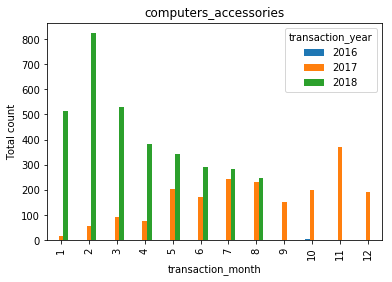

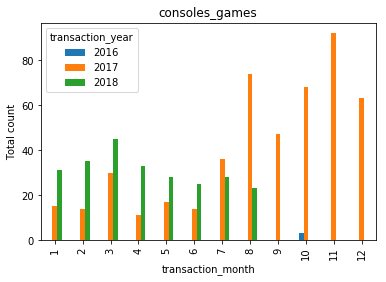

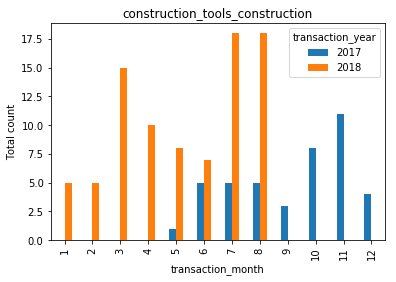

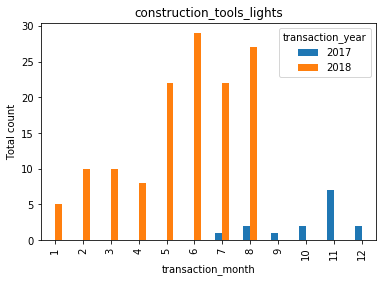

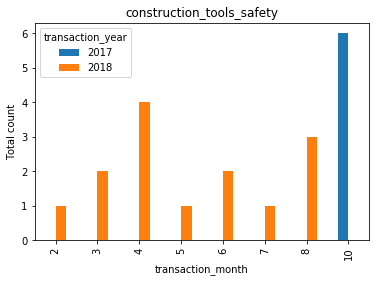

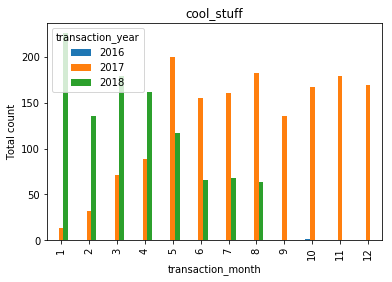

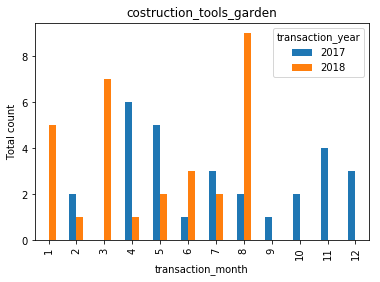

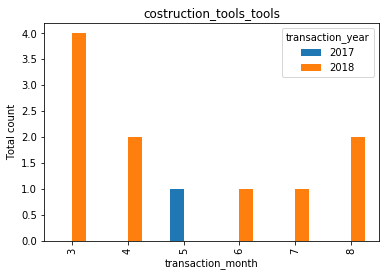

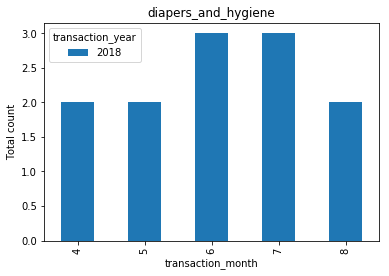

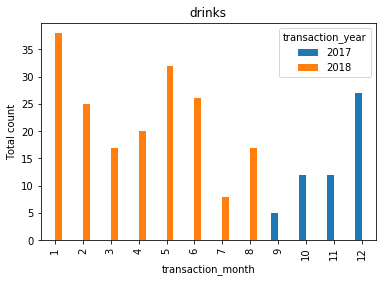

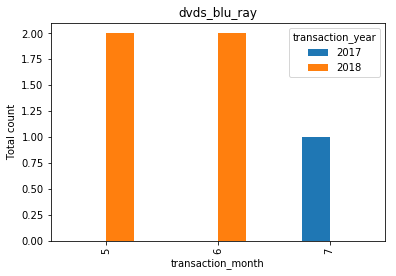

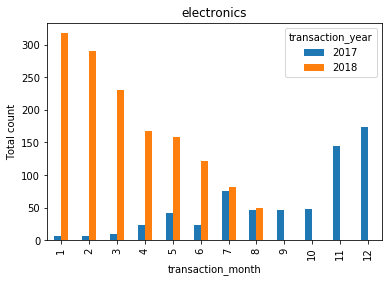

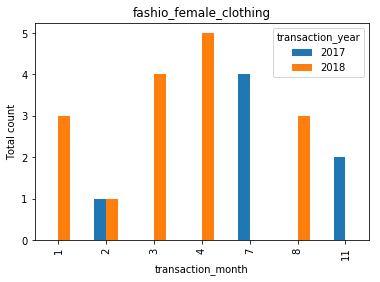

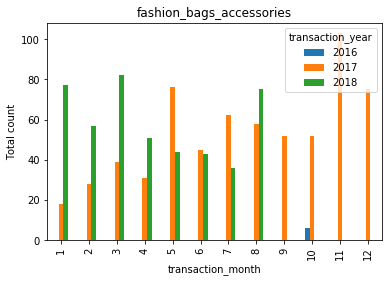

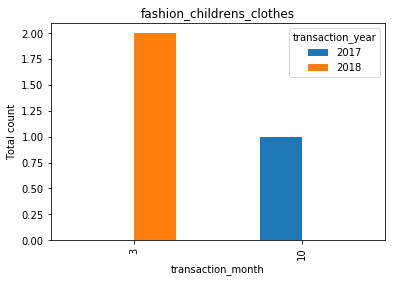

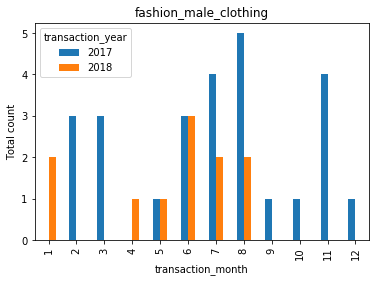

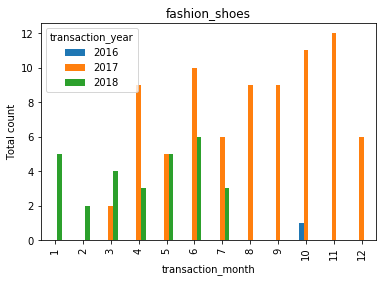

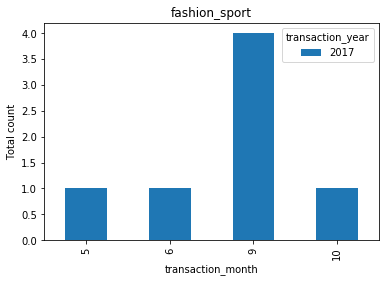

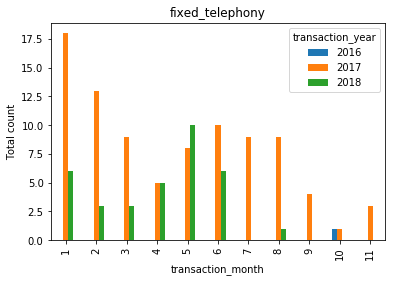

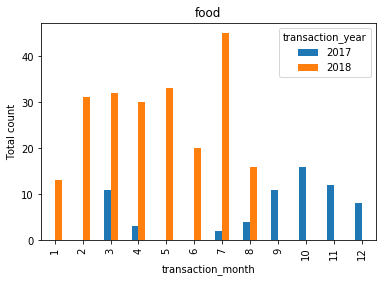

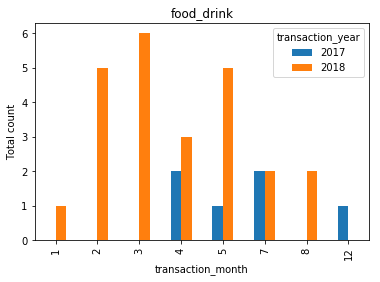

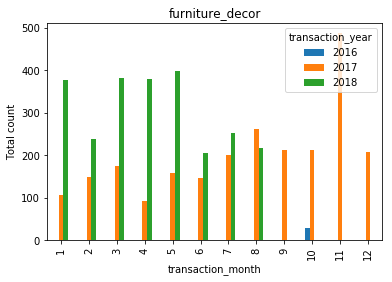

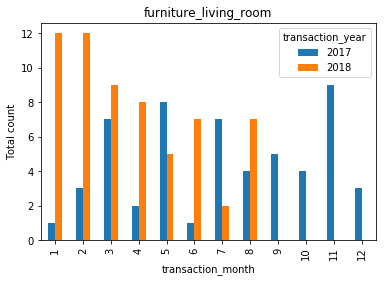

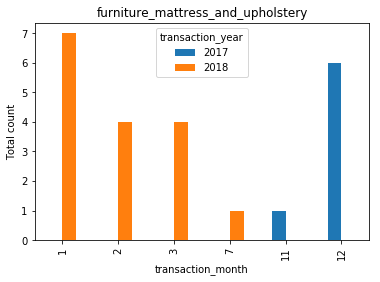

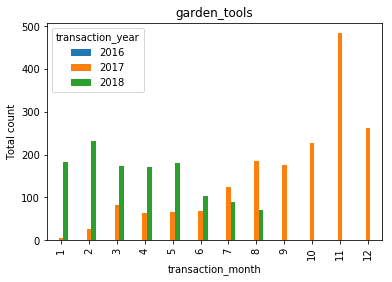

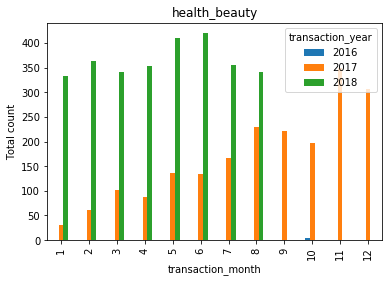

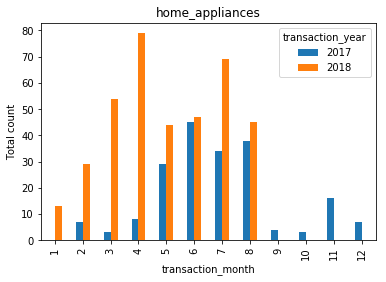

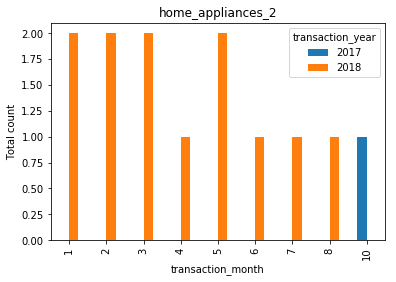

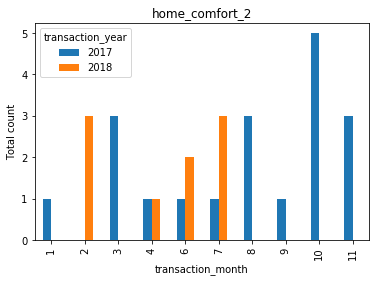

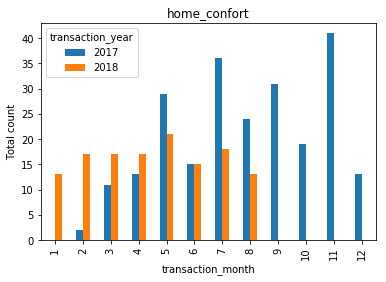

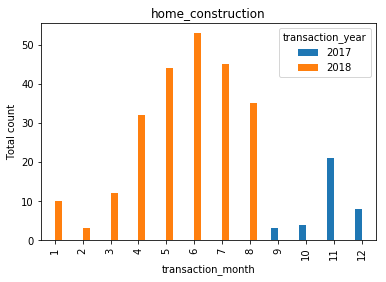

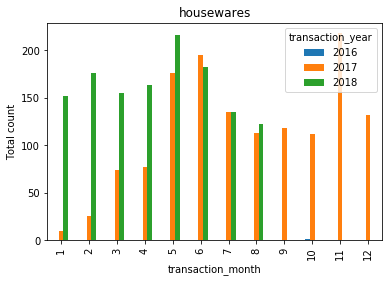

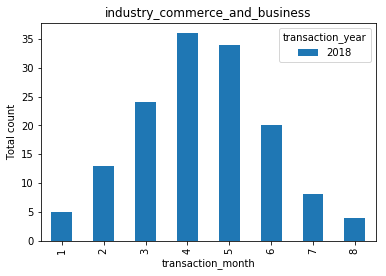

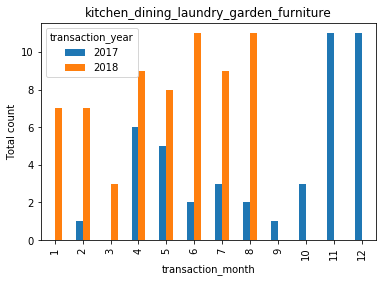

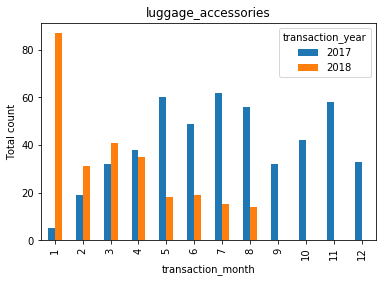

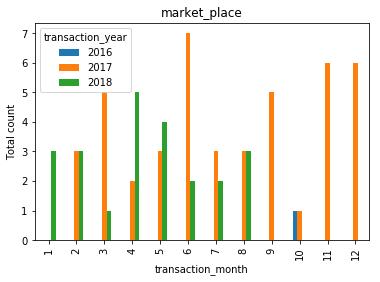

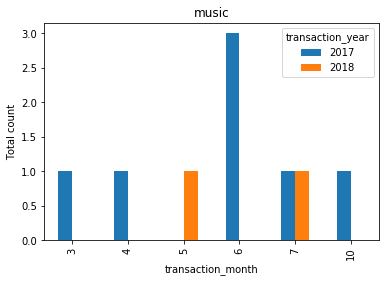

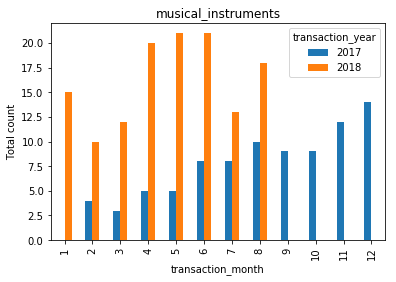

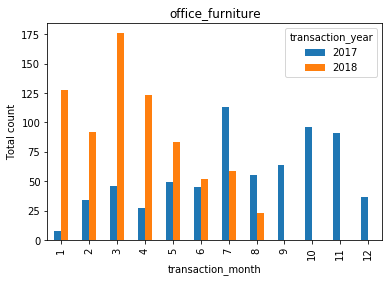

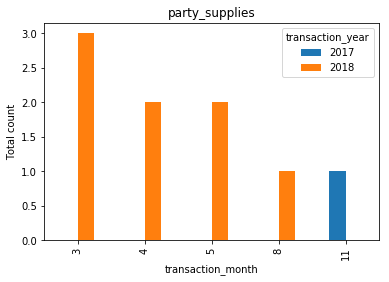

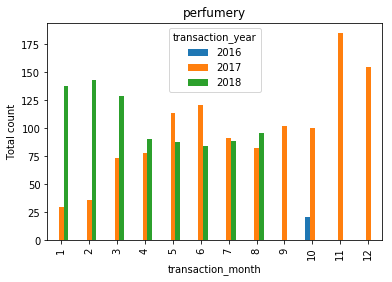

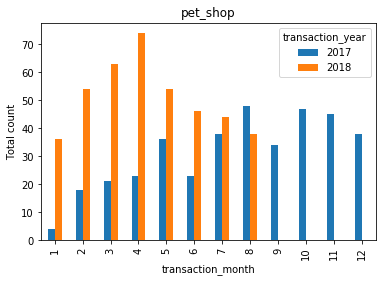

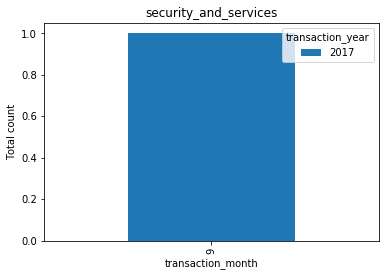

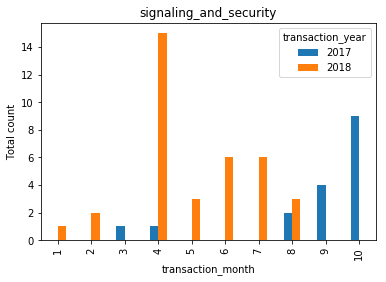

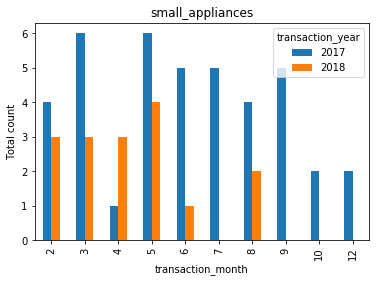

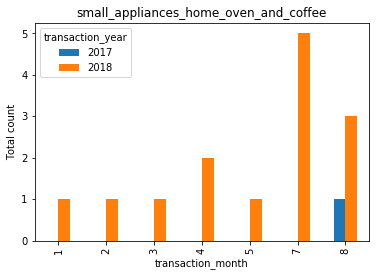

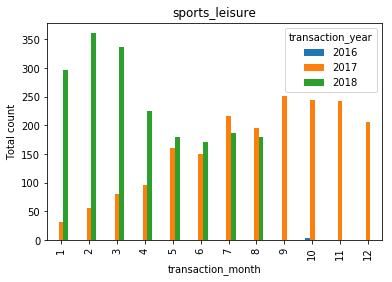

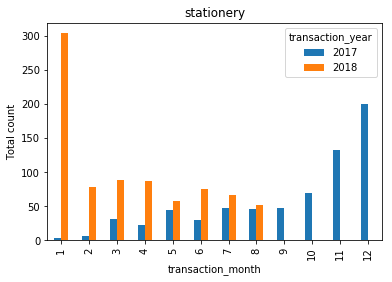

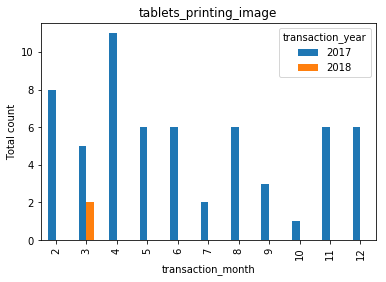

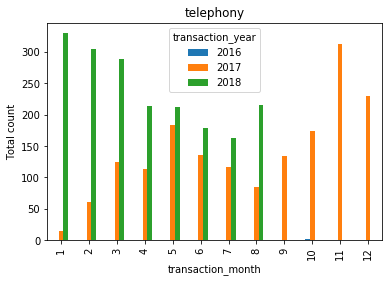

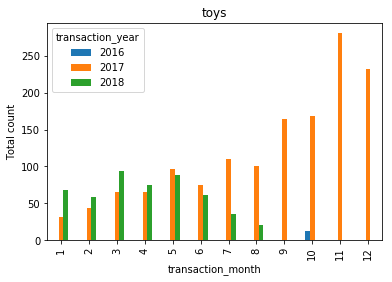

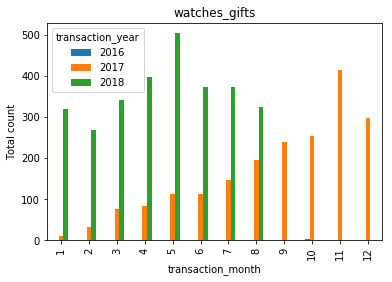

In [41]:
for i in range(len(list_of_prod_cat)):
    data_new_count[(data_new_count['product_category_name_english']==list_of_prod_cat[i])].pivot("transaction_month", "transaction_year", "count").plot(kind='bar')
    plt.title(list_of_prod_cat[i])
    plt.ylabel("Total count")
    plt.subplot()


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


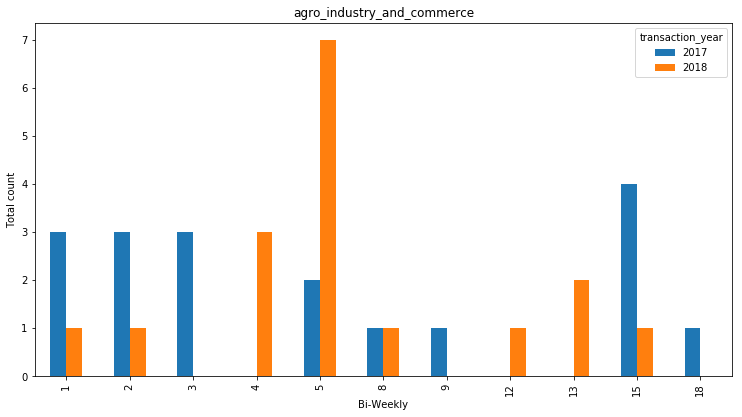

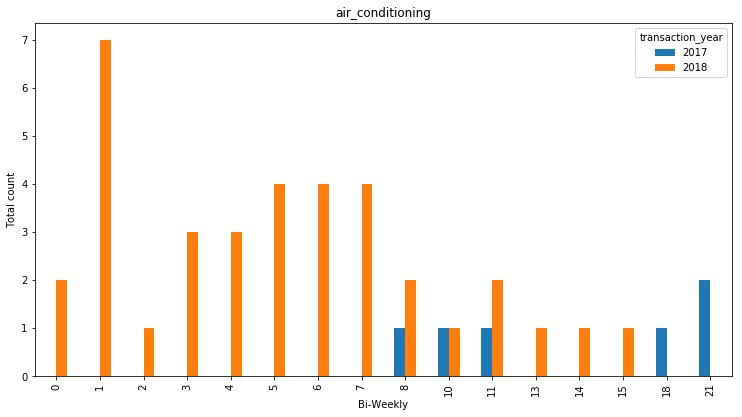

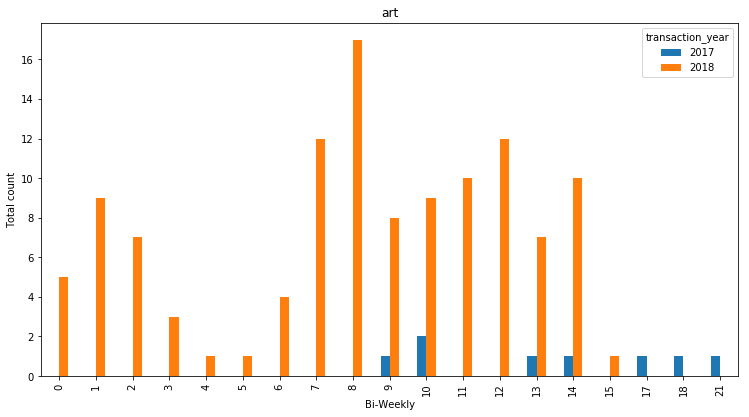

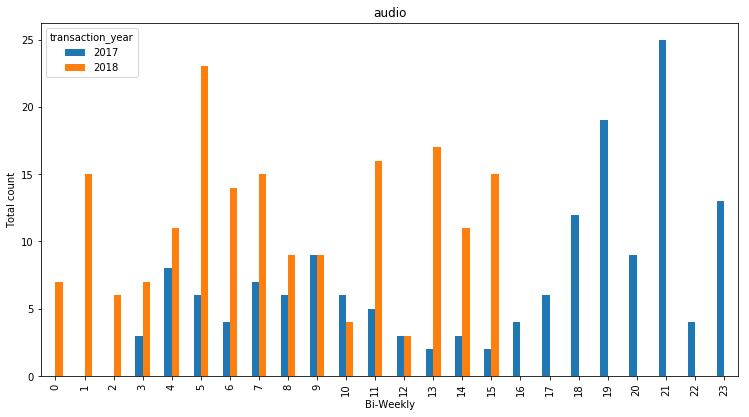

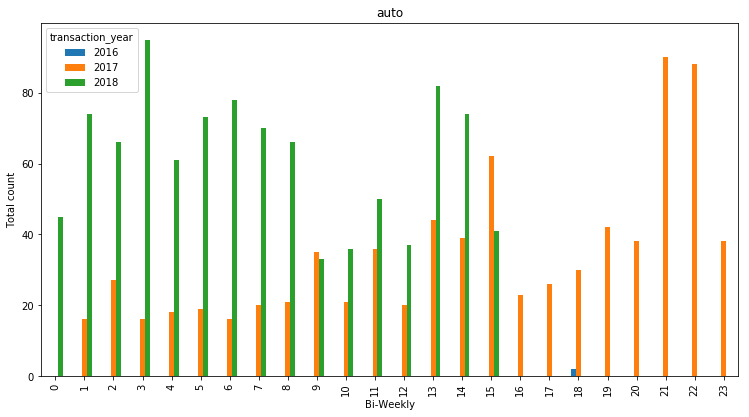

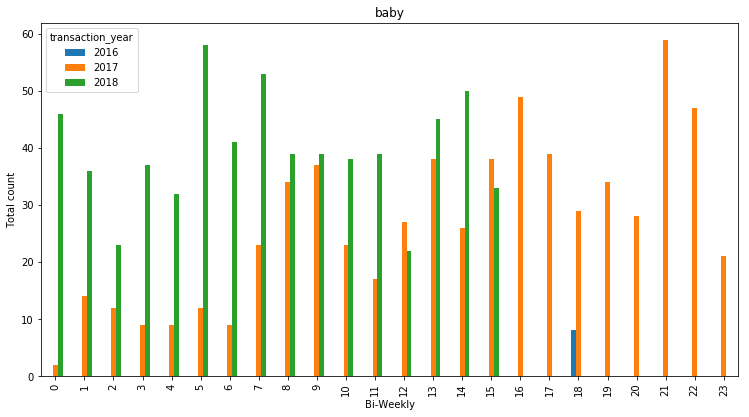

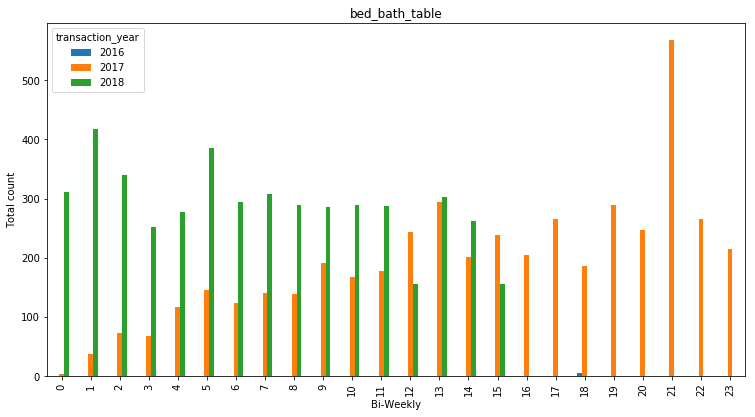

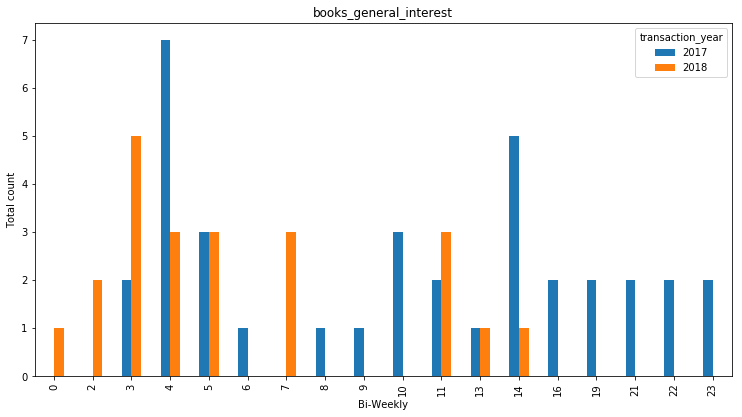

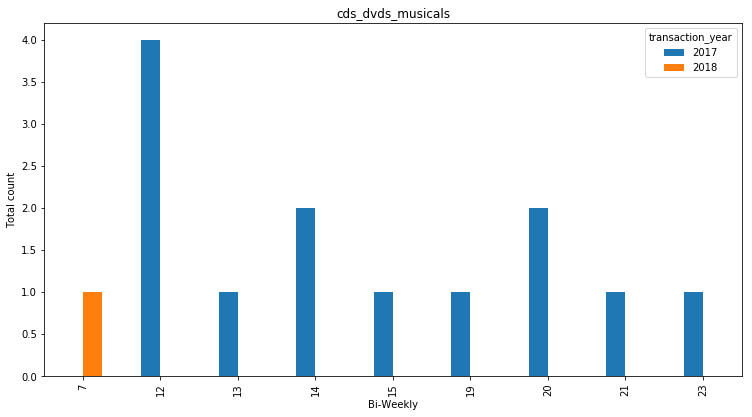

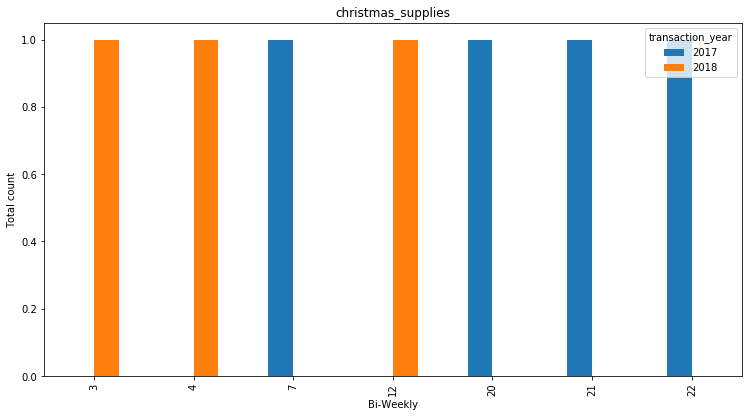

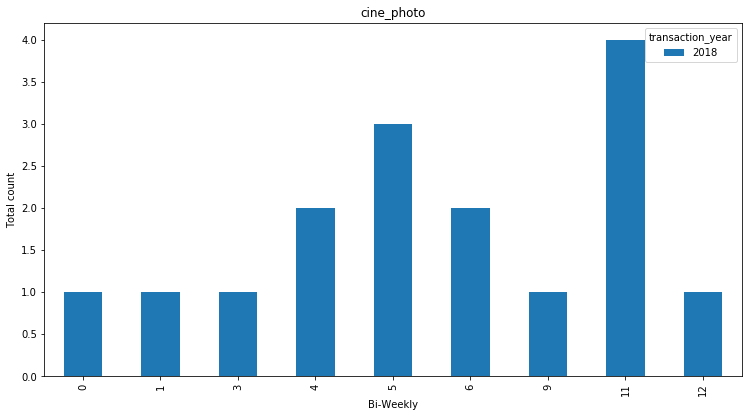

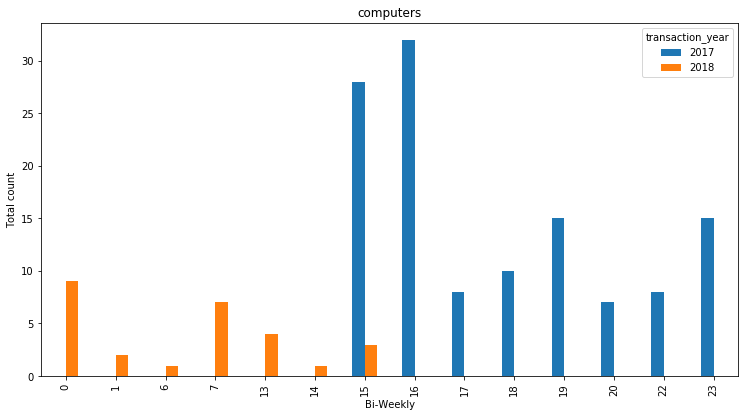

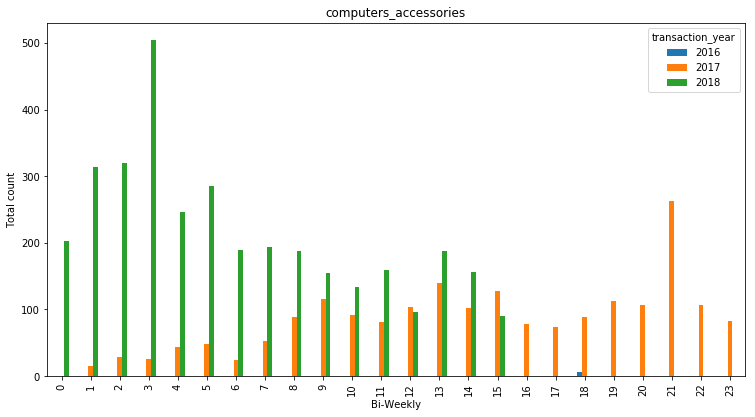

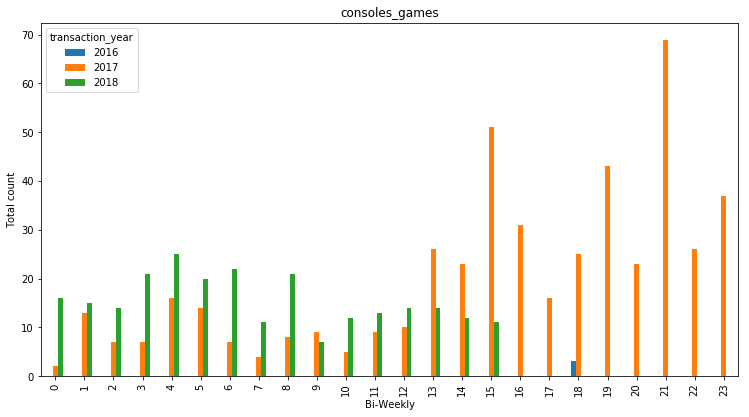

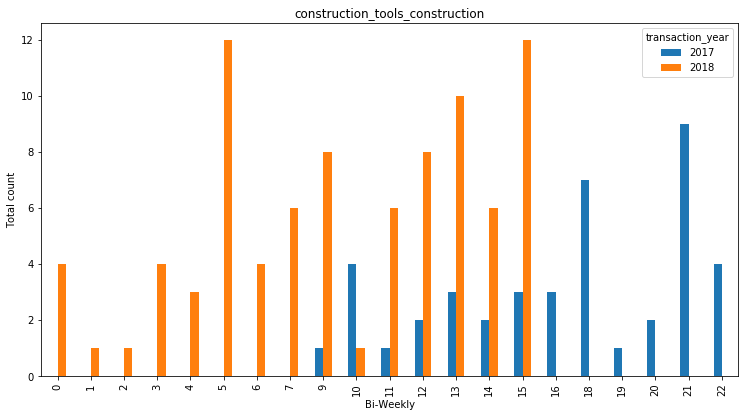

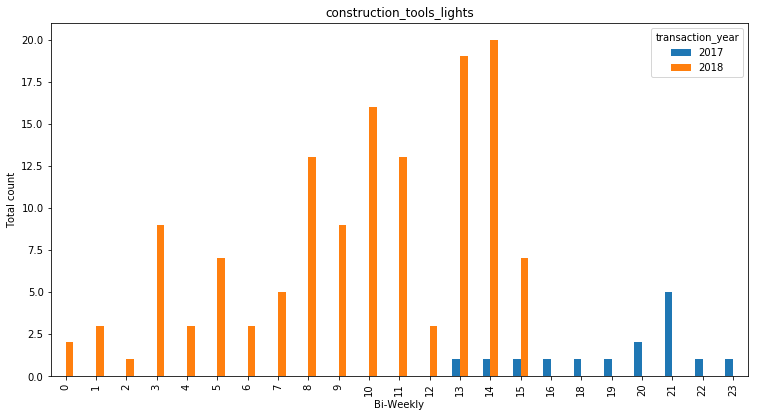

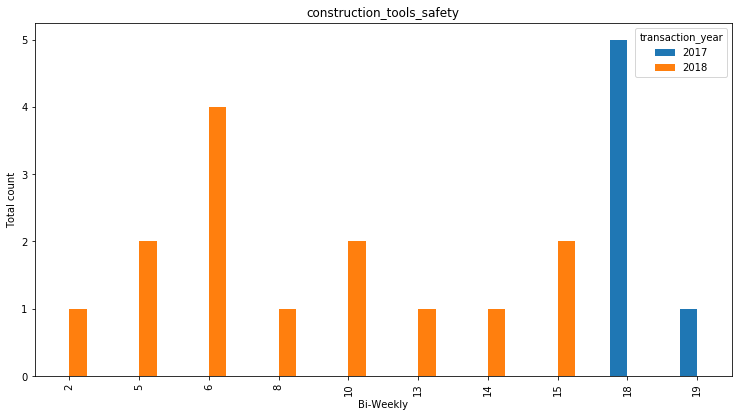

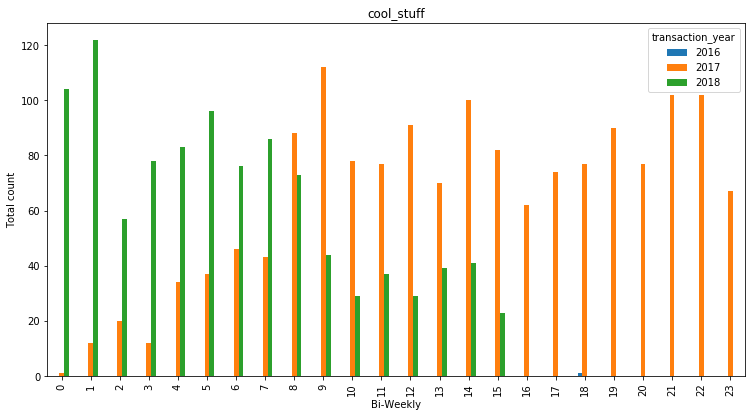

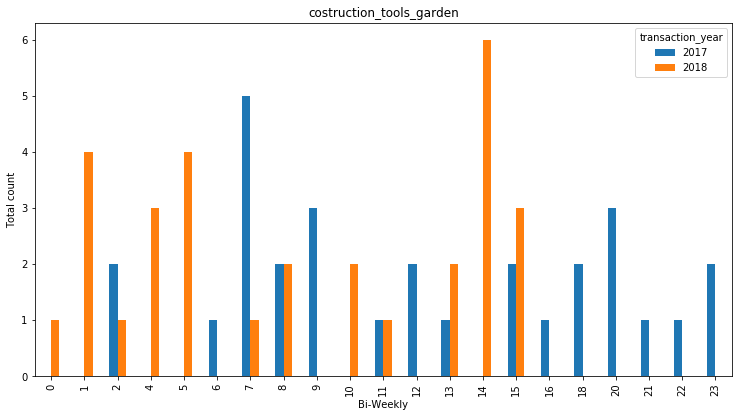

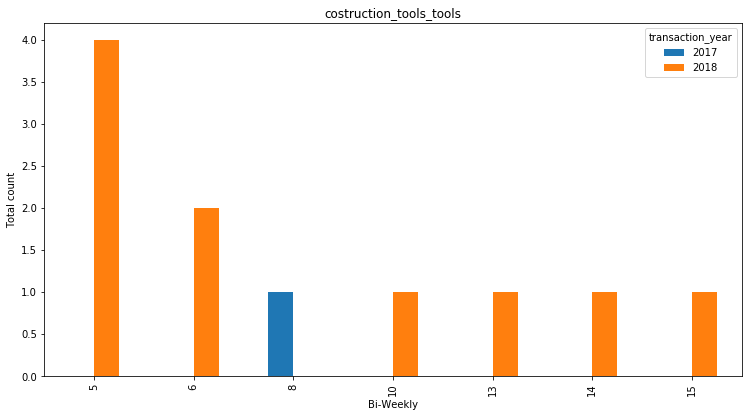

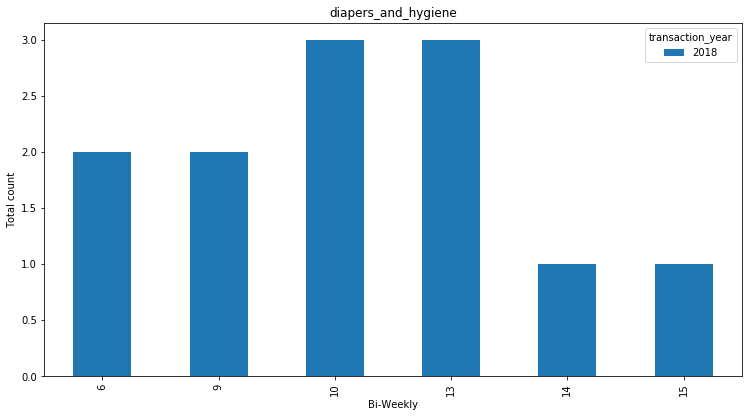

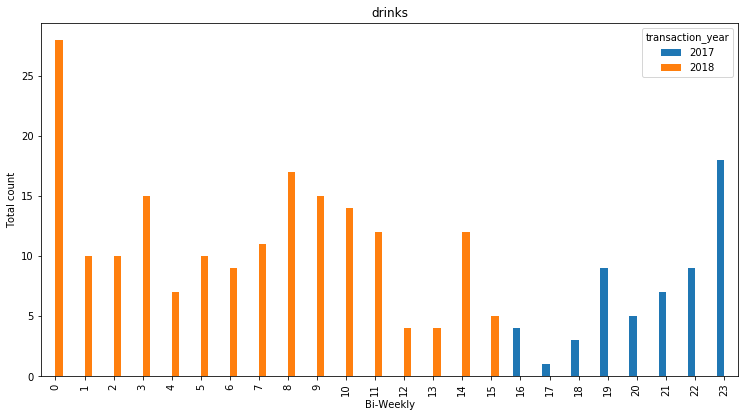

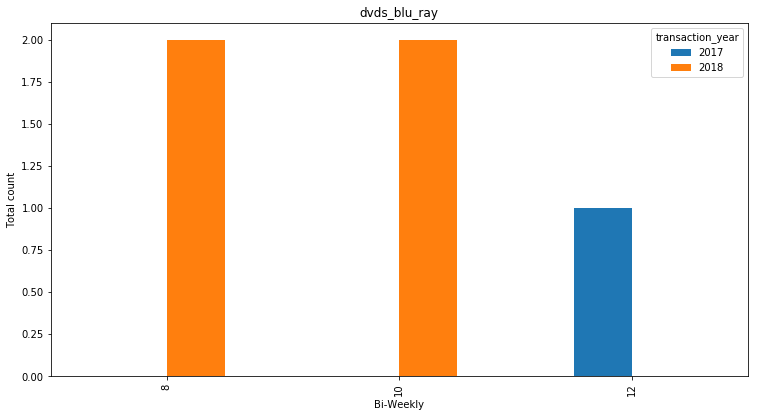

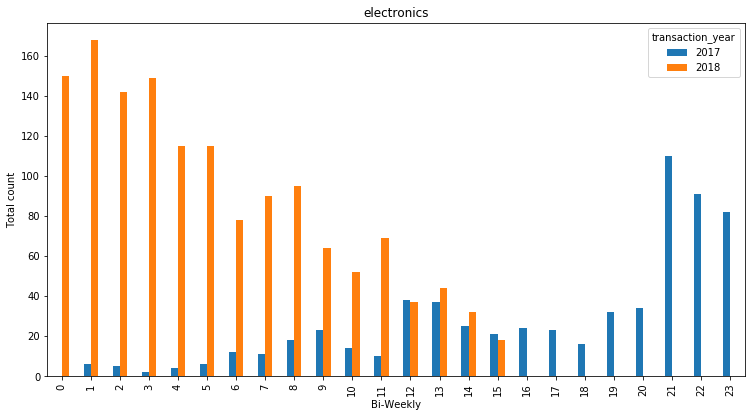

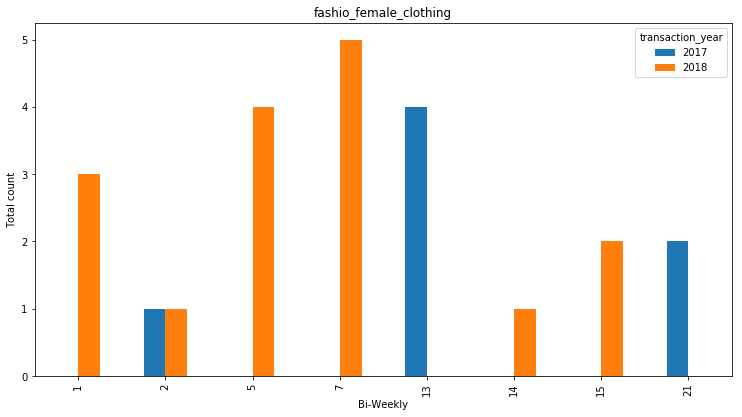

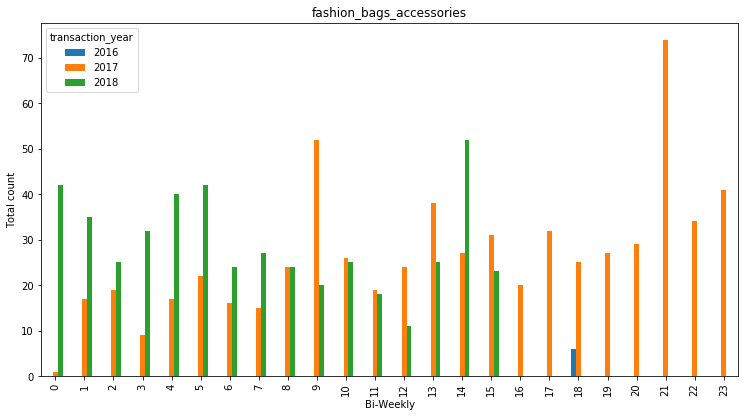

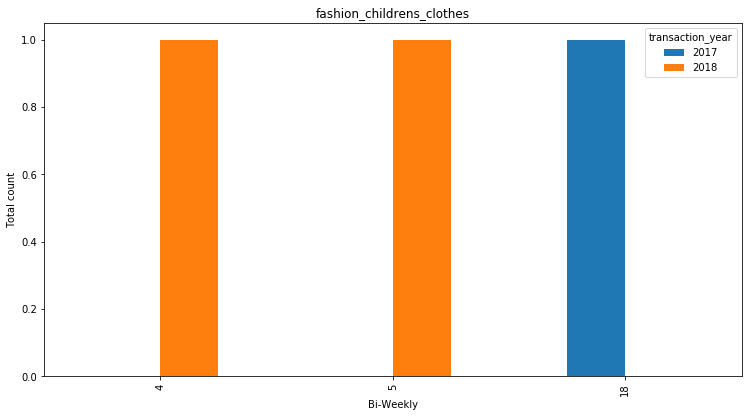

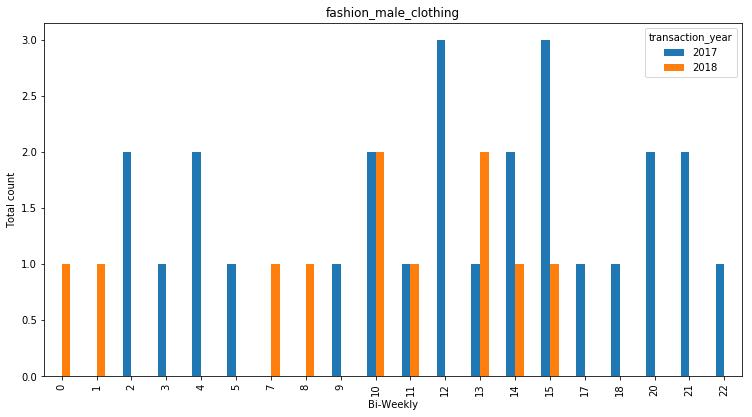

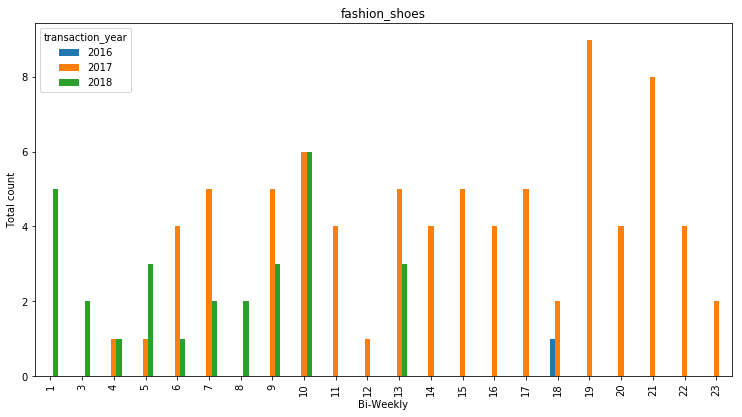

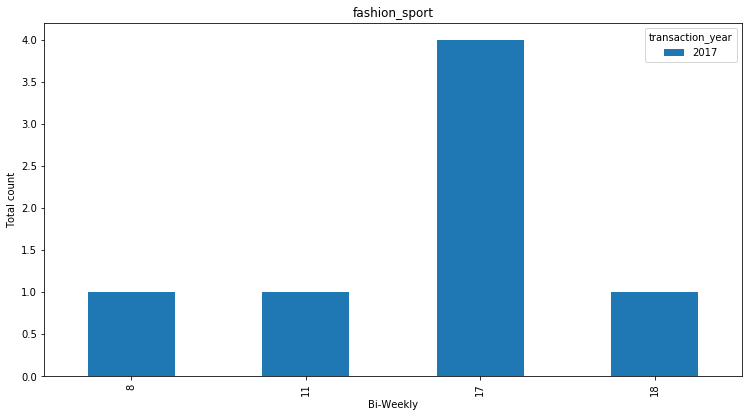

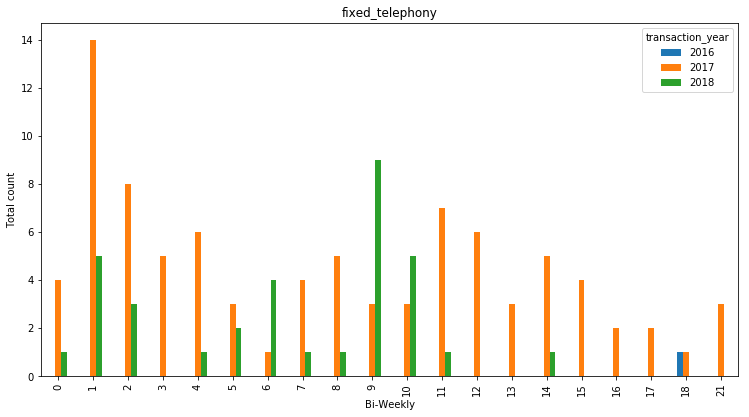

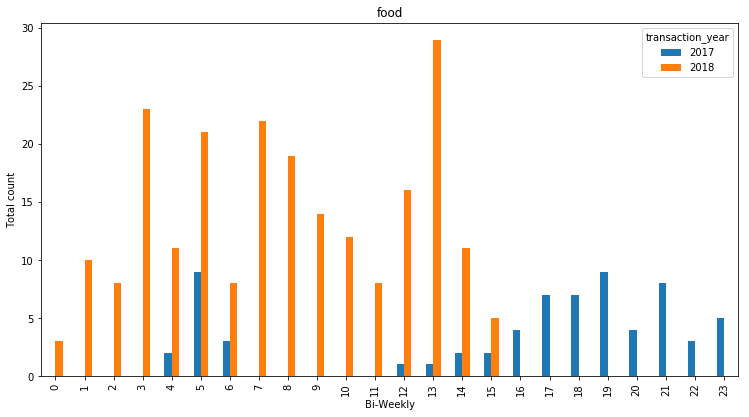

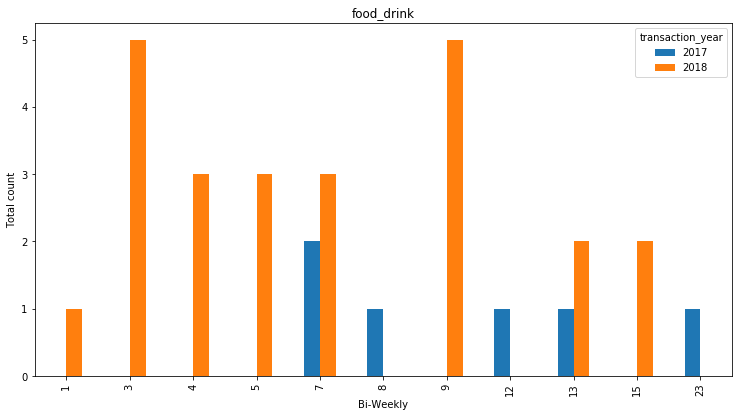

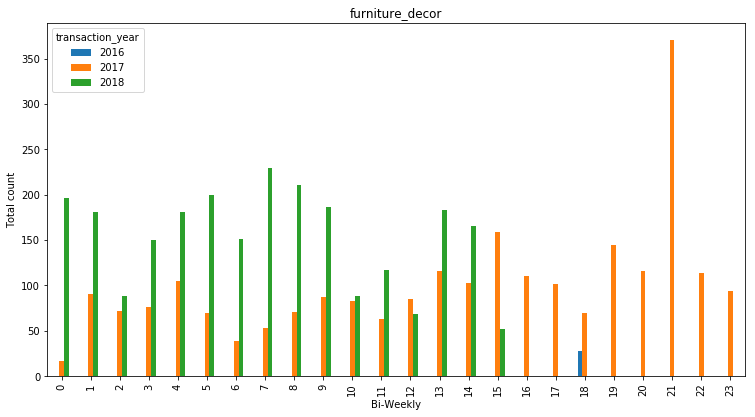

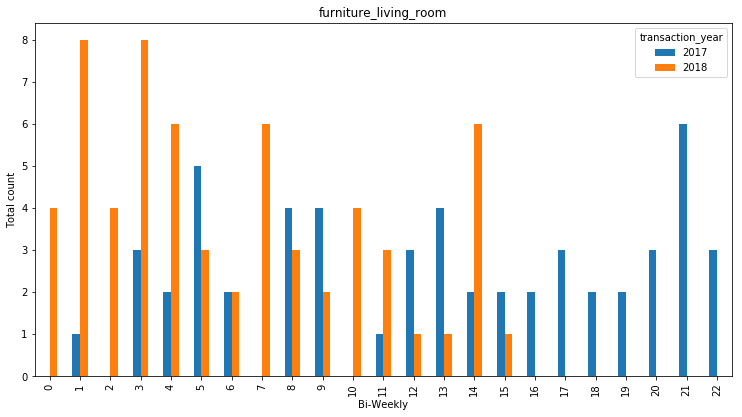

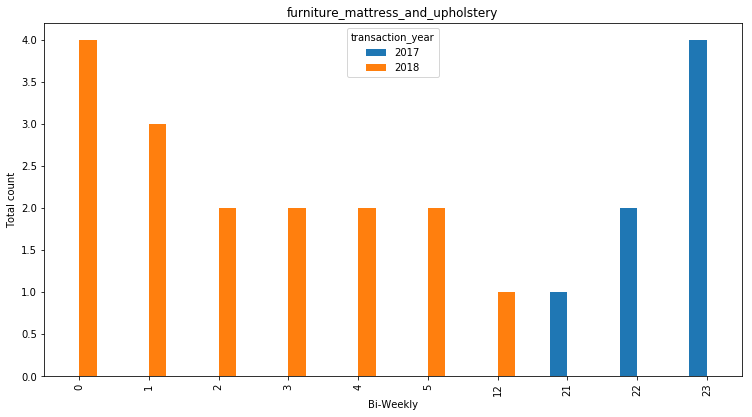

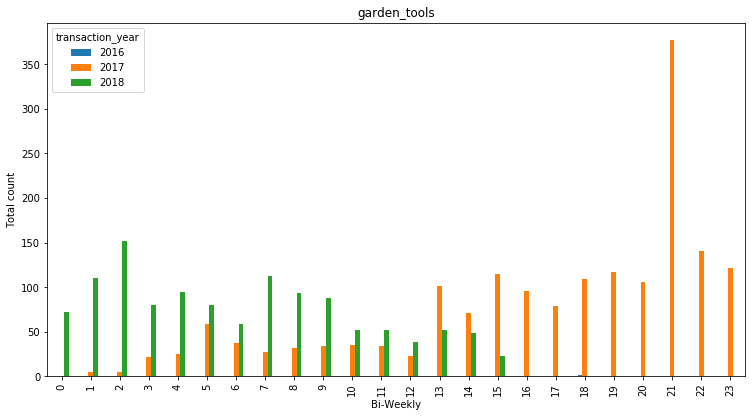

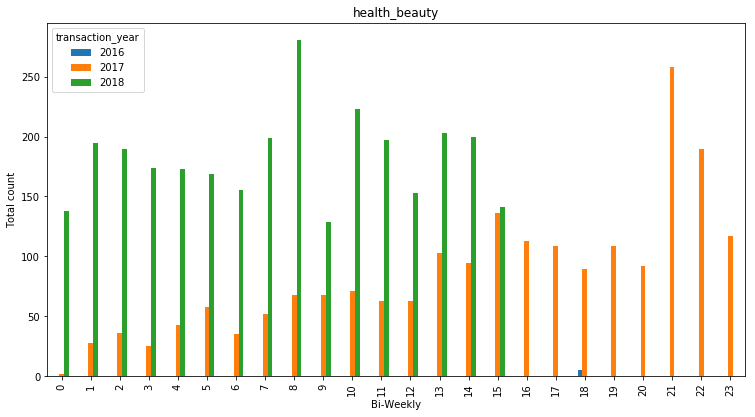

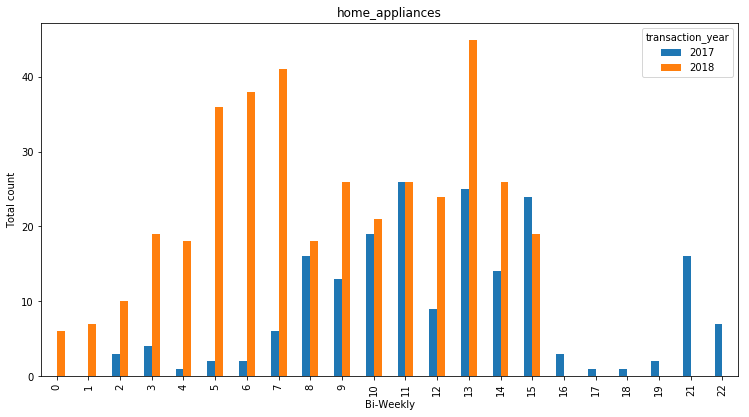

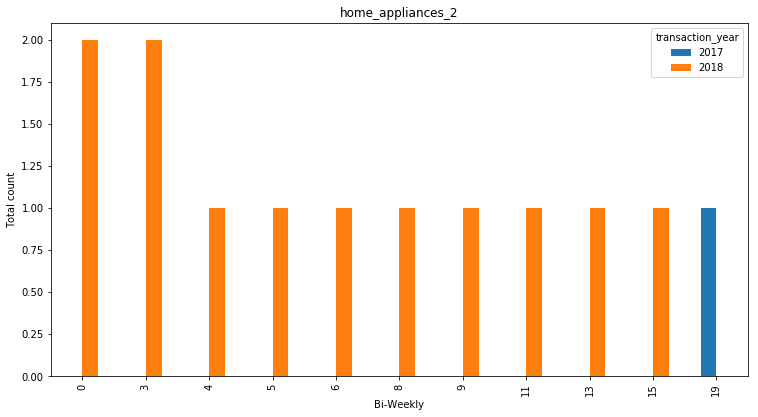

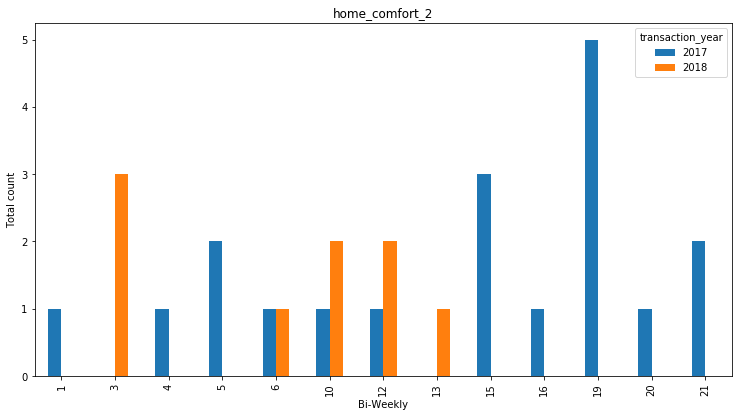

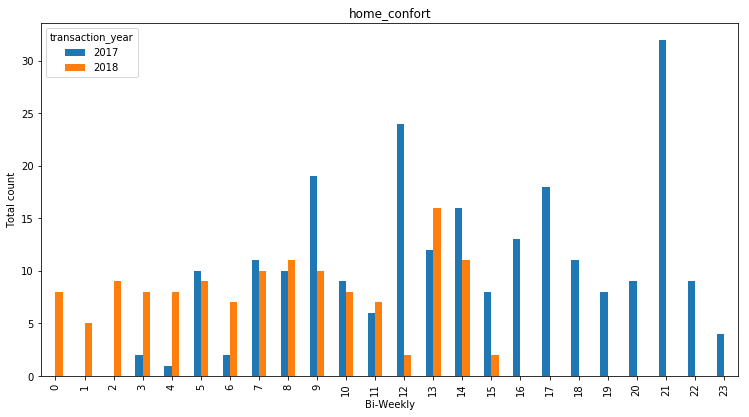

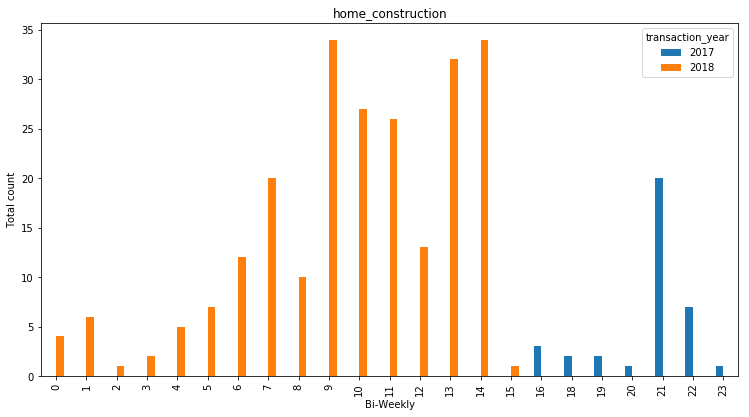

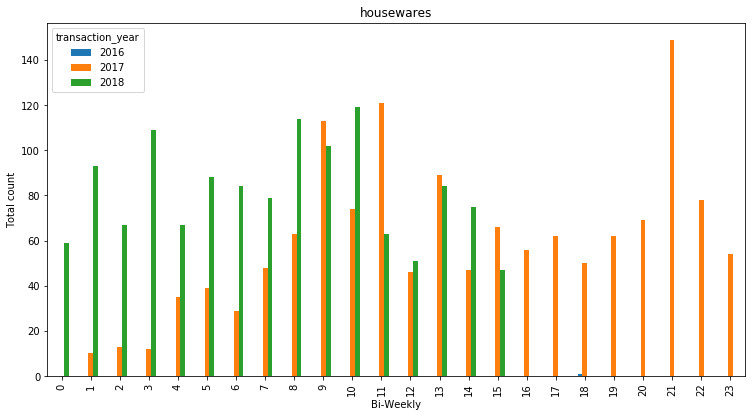

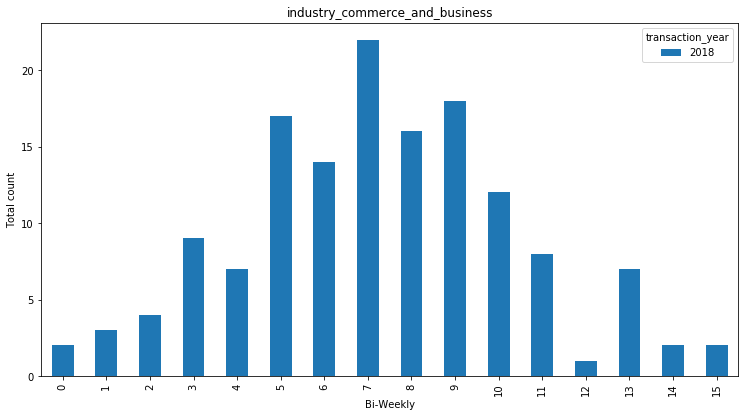

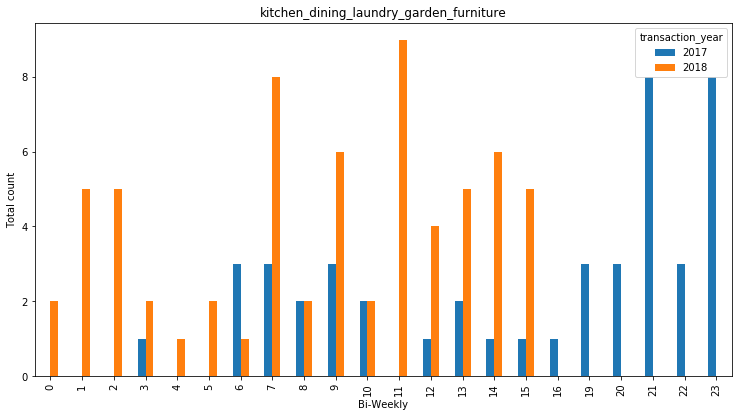

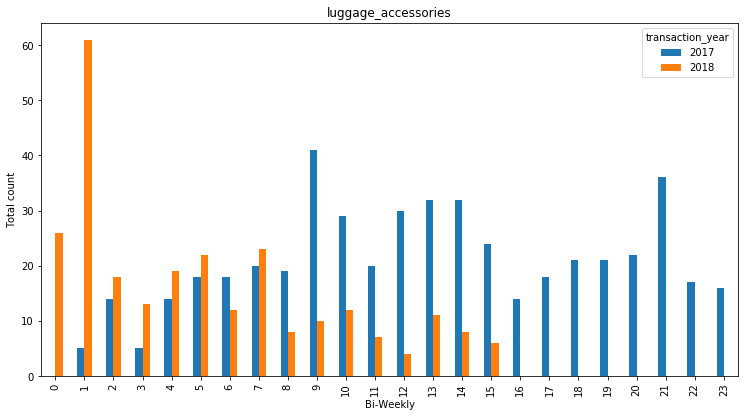

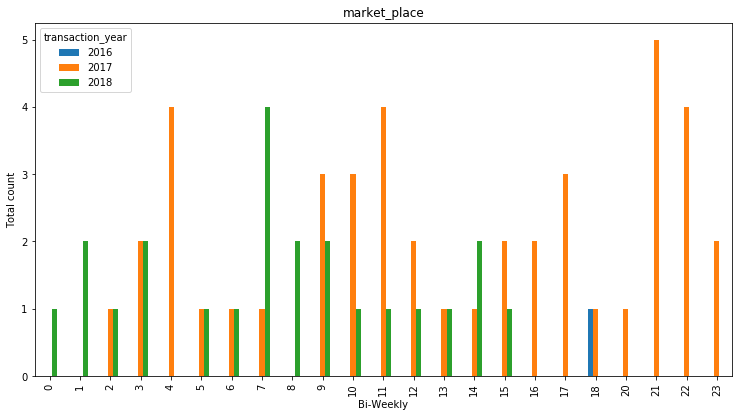

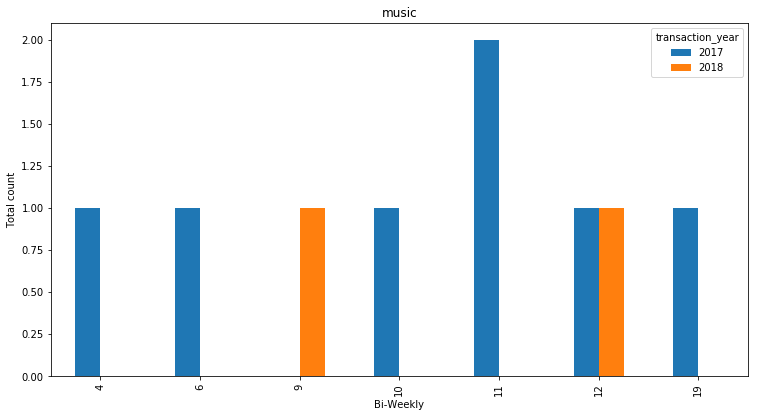

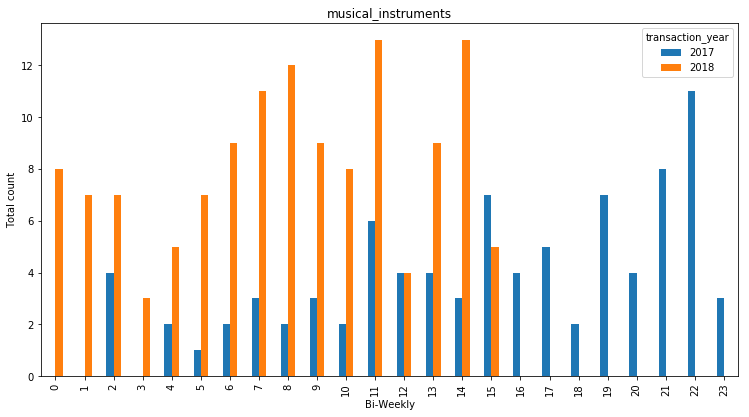

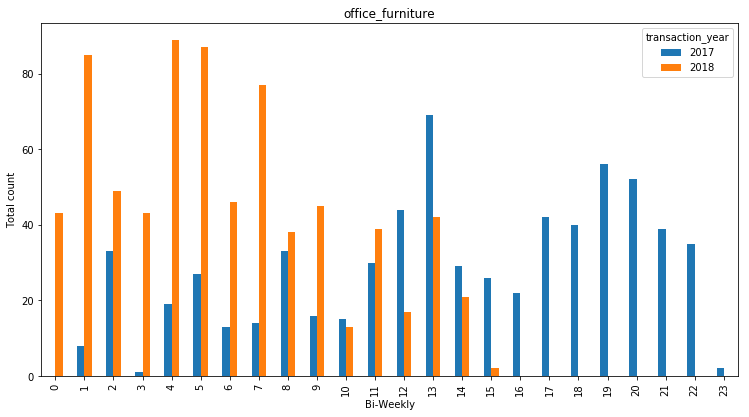

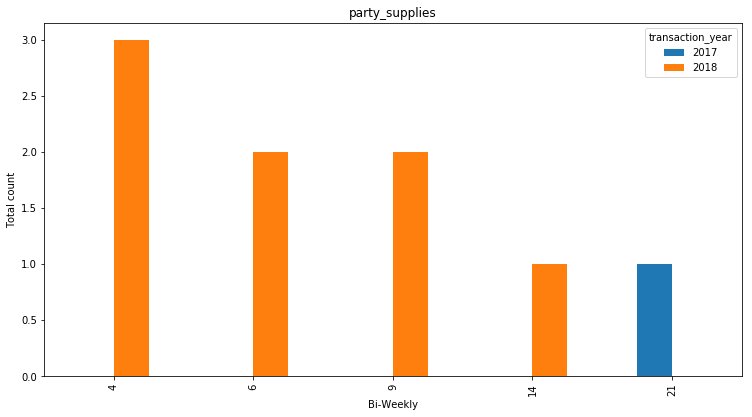

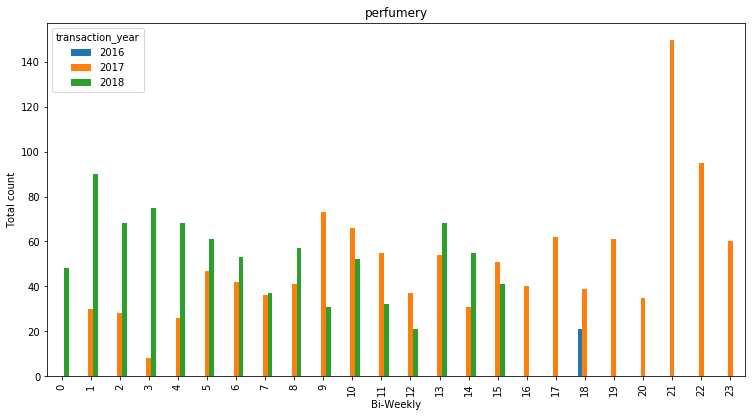

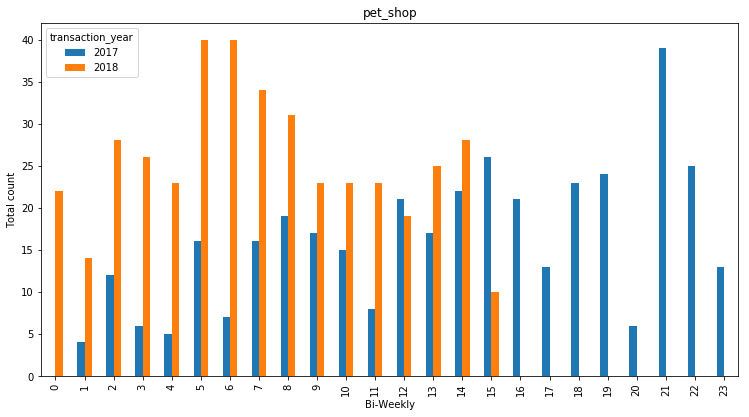

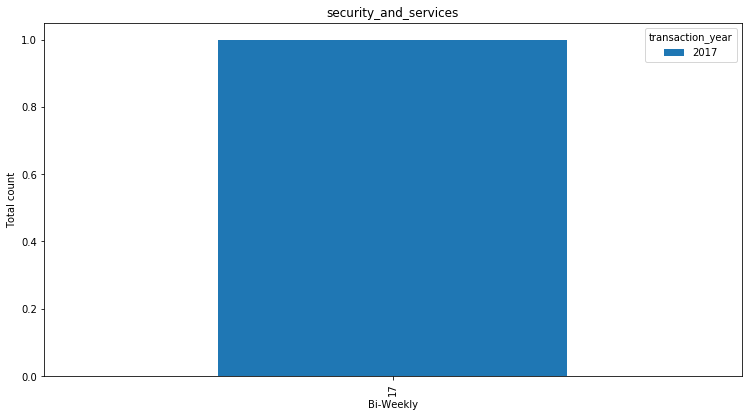

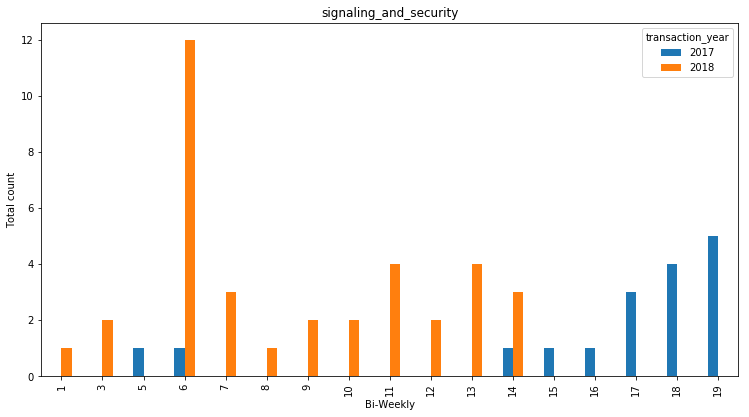

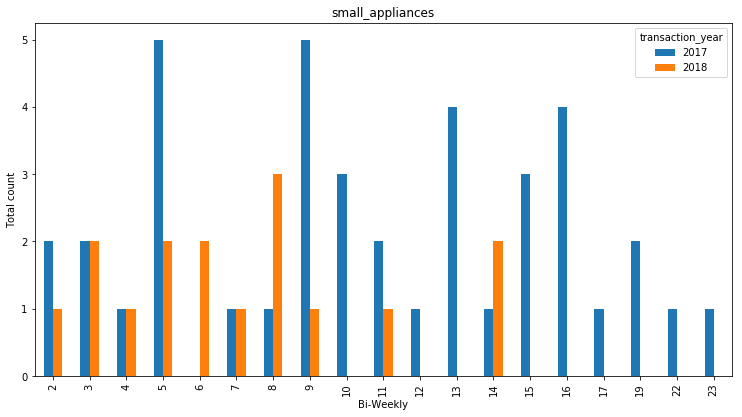

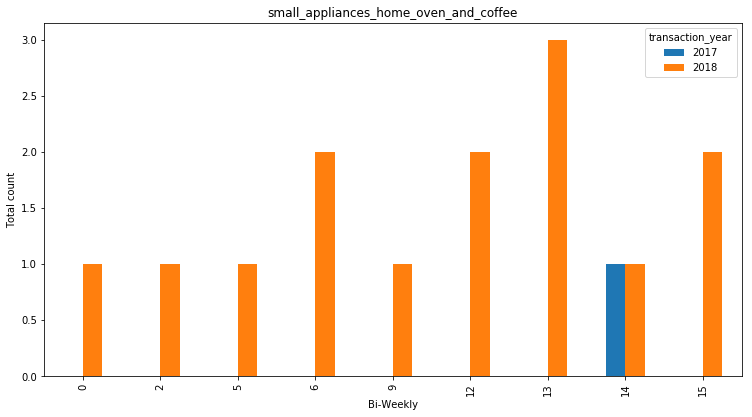

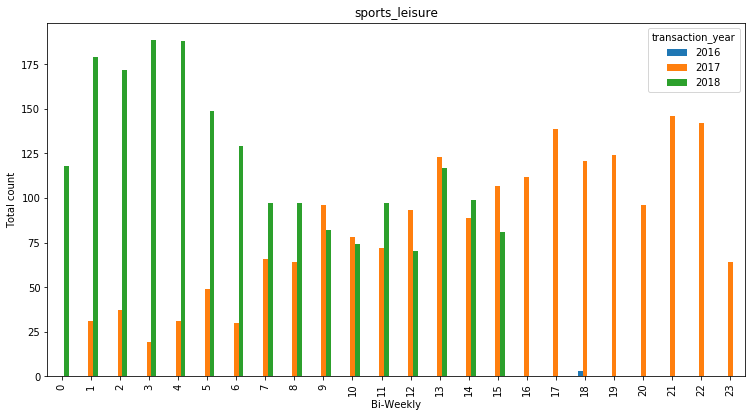

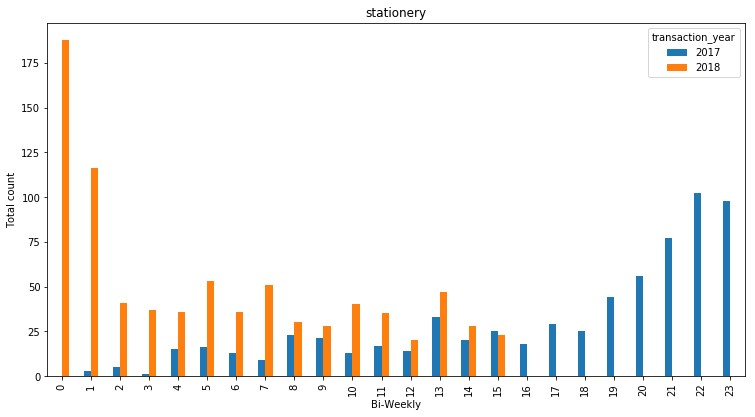

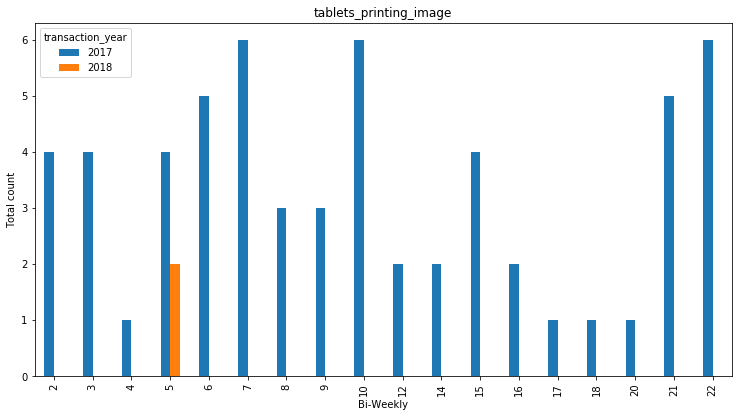

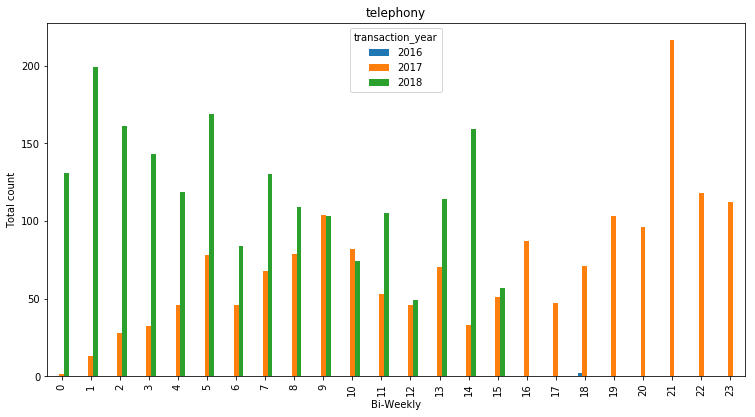

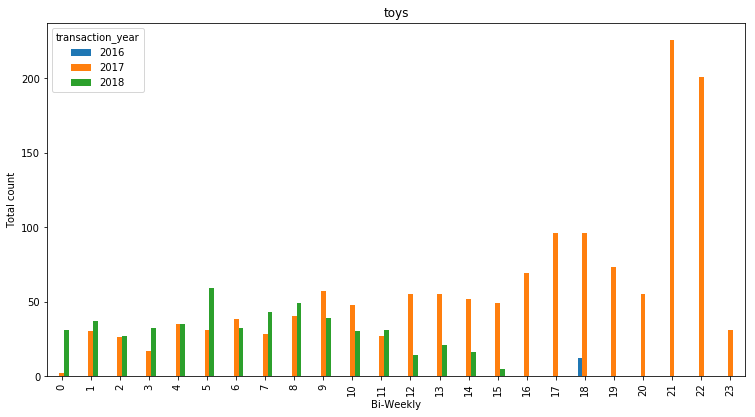

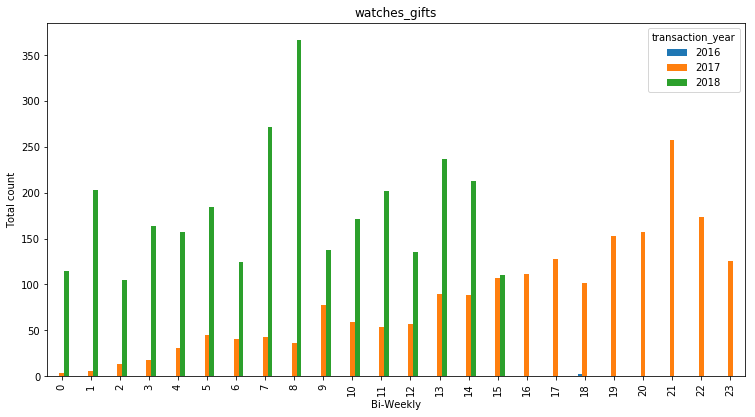

In [42]:
for i in range(len(list_of_prod_cat_weekly)):
    data_new_count_weekly[(data_new_count_weekly['product_category_name_english']==list_of_prod_cat_weekly[i])].pivot("Bi-Weekly", "transaction_year", "count").plot(kind='bar')
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    plt.title(list_of_prod_cat_weekly[i])
    plt.ylabel("Total count")
    plt.subplot()

In [43]:
#creating data frame of seller ids of out interest
data_under_observation=data_new[data_new['seller_id'].isin(list_of_Sellers)]


data_under_observation_count=data_under_observation.groupby(['seller_id','product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
print(data_under_observation_count)

                            seller_id product_category_name_english  \
0    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
1    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
2    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
3    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
4    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
5    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
6    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
7    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
8    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
9    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
10   1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
11   1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
12   1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
13   1

In [44]:
## Repeating the same for Bi-Weekly


data_under_observation_count_weekly=data_under_observation.groupby(['seller_id','product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
print(data_under_observation_count_weekly)


                             seller_id product_category_name_english  \
0     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
1     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
2     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
3     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
4     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
5     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
6     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
7     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
8     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
9     1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
10    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
11    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_lights   
12    1025f0e2d44d7041d6cf58b6550e0bfa     construction_tools_li

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


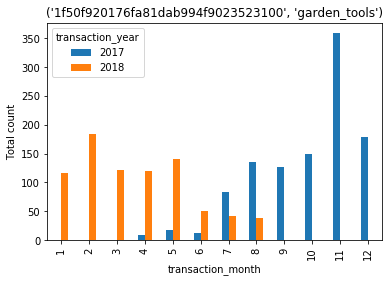

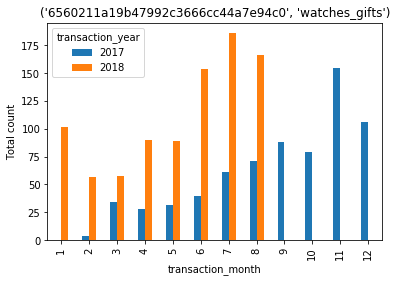

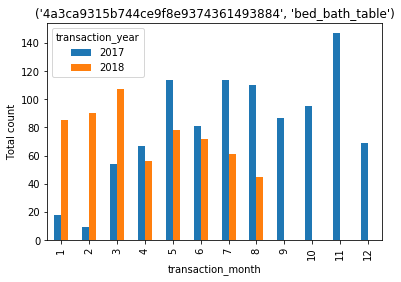

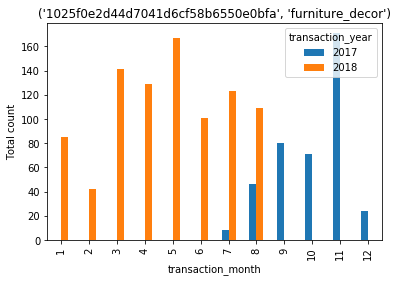

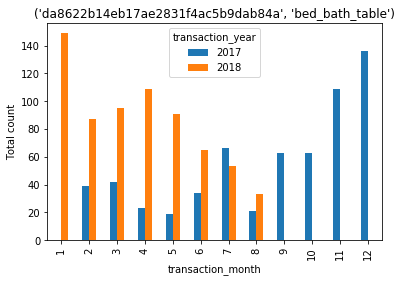

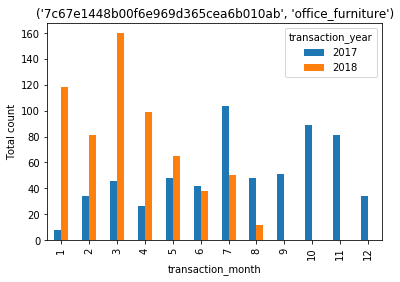

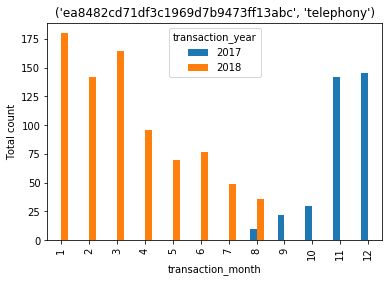

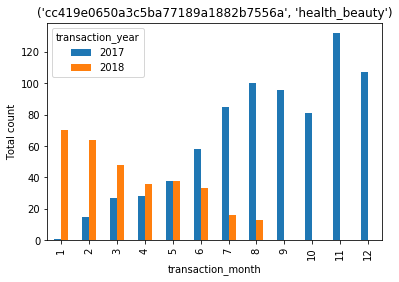

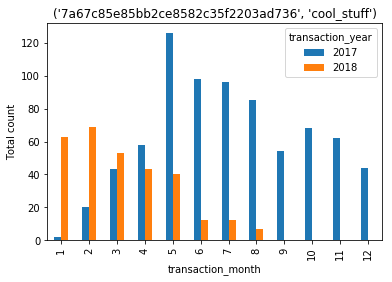

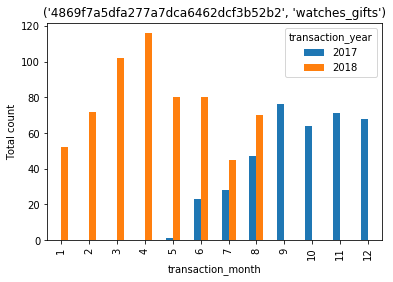

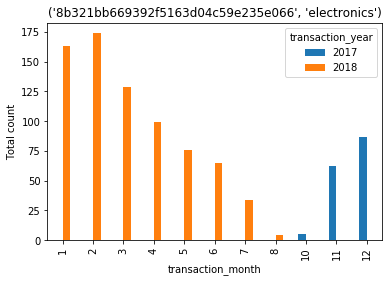

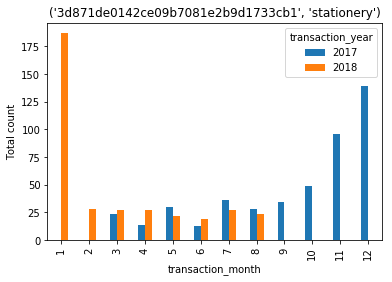

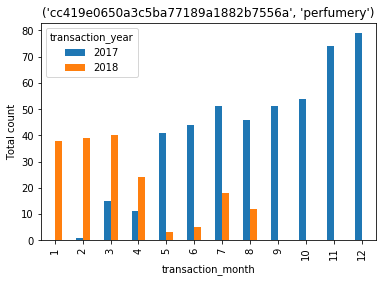

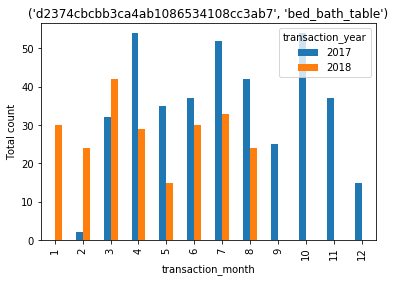

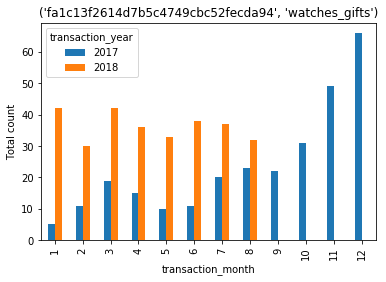

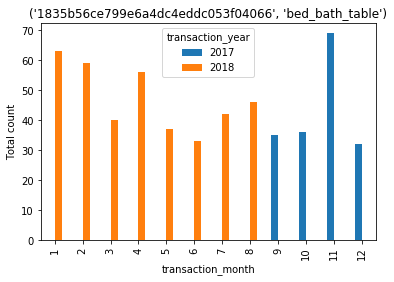

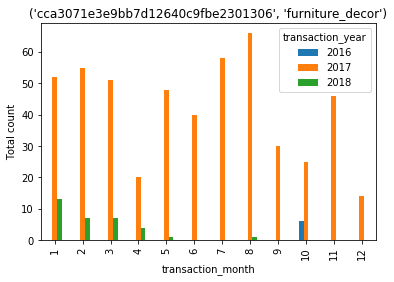

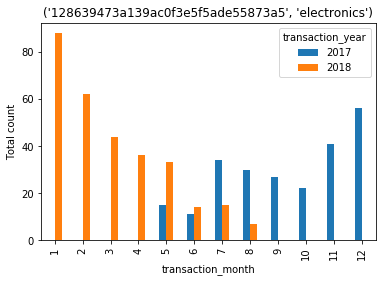

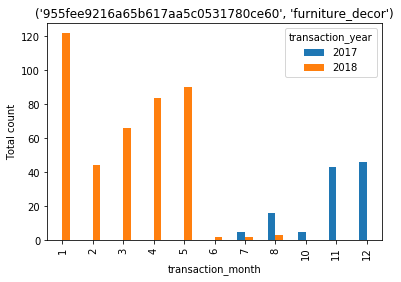

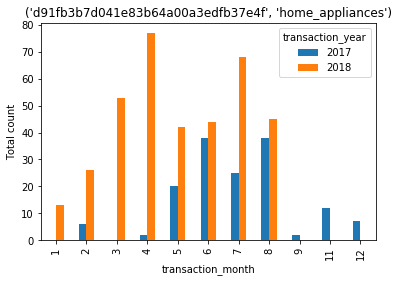

In [45]:
for i in range(len(list_of_Sellers)):
    data_under_observation_count[((data_under_observation_count['product_category_name_english']==list_of_Prod[i]) & (data_under_observation_count['seller_id']==list_of_Sellers[i]))].pivot("transaction_month", "transaction_year", "count").plot(kind='bar')
    plt.title((list_of_Sellers[i],list_of_Prod[i]))
    plt.ylabel("Total count")
    plt.subplot()

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


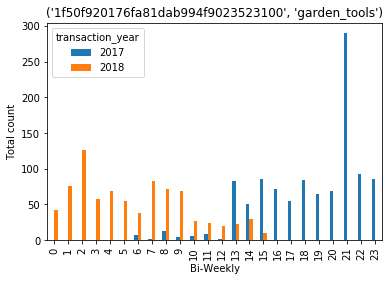

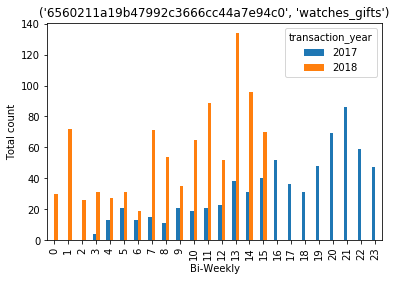

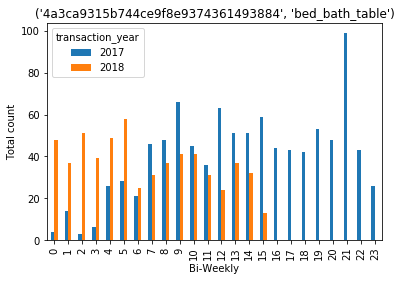

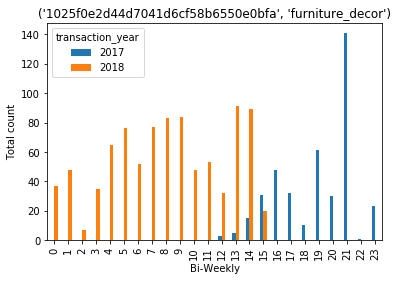

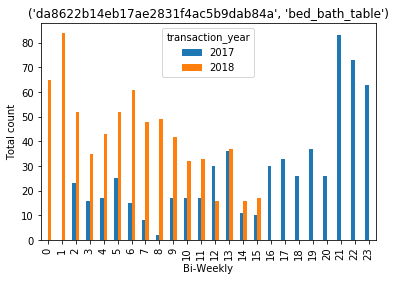

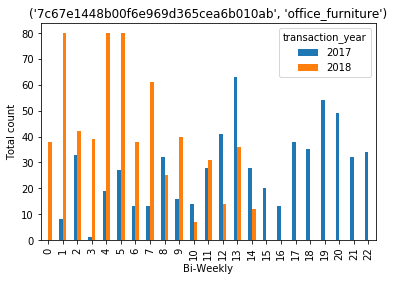

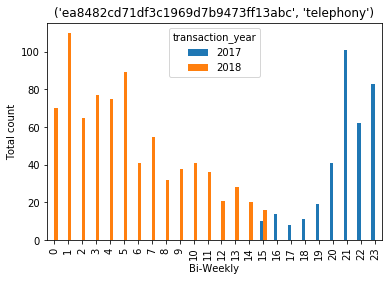

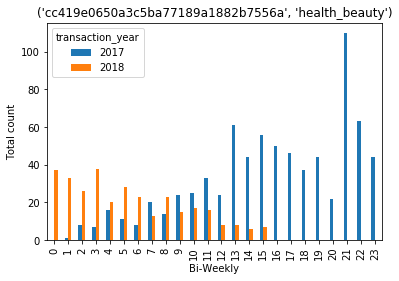

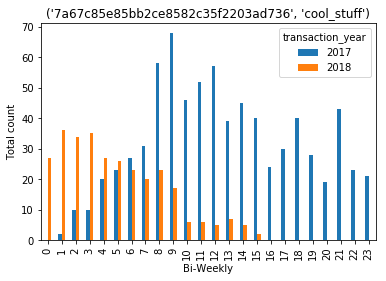

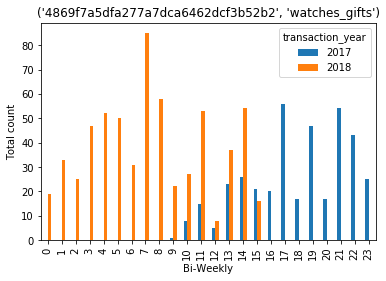

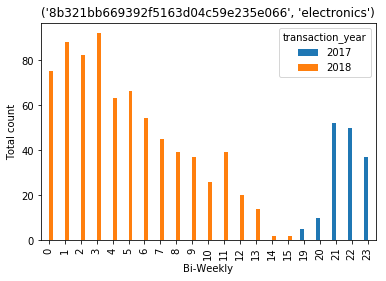

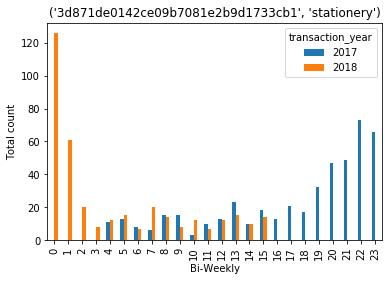

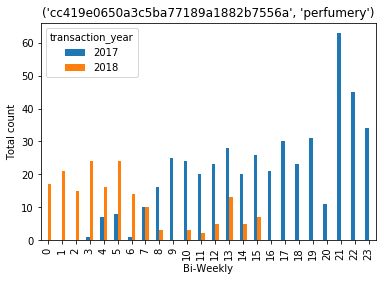

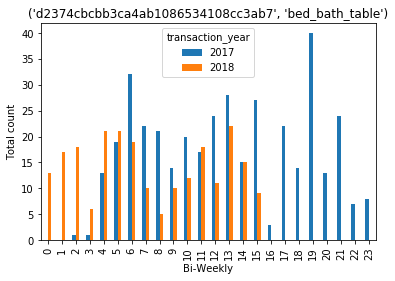

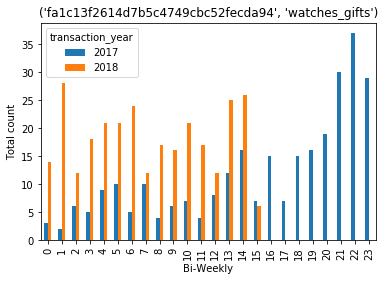

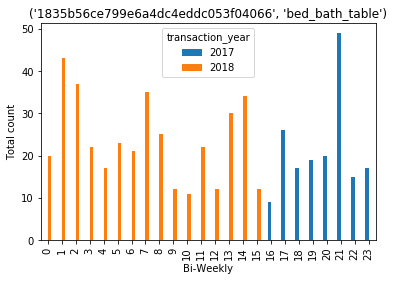

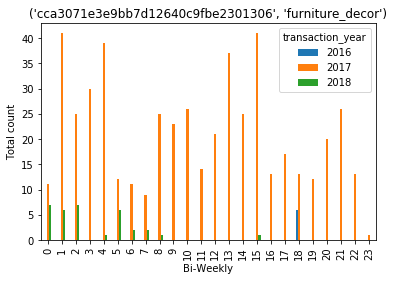

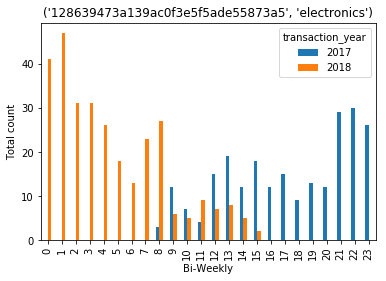

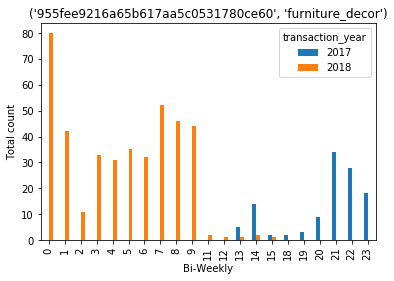

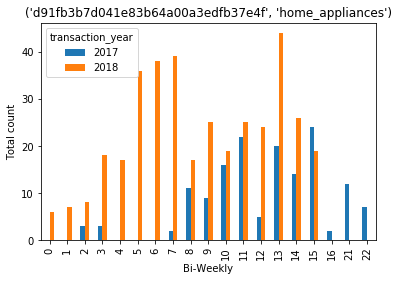

In [46]:
for i in range(len(list_of_Sellers)):
    data_under_observation_count_weekly[((data_under_observation_count_weekly['product_category_name_english']==list_of_Prod[i]) & (data_under_observation_count_weekly['seller_id']==list_of_Sellers[i]))].pivot("Bi-Weekly", "transaction_year", "count").plot(kind='bar')
    plt.title((list_of_Sellers[i],list_of_Prod[i]))
    plt.ylabel("Total count")
    plt.subplot()

In [48]:
def seller_monthly_transaction_count(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
    print("Monthly seller count for the particular seller:")
    print(seller_count)
    
    #graph for 2018

    month=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']== product_category)]['transaction_month'])
    count=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']==product_category)]['count'])
    plt.bar(month, count, color="blue")
    plt.title('Counts of product sold in 2018')
    plt.xlabel('Month')
    plt.ylabel('Count of Product sold')
    plt.show()
    
    #graph for 2017

    seller_count=seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
    month=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']== product_category)]['transaction_month'])
    count=(highest_sale_seller_count[(highest_sale_seller_count['transaction_year']==2017) & (highest_sale_seller_count['product_category_name_english']==product_category)]['count'])
    plt.bar(month, count, color="blue")
    plt.title('Counts of products sold in 2017')
    plt.xlabel('Month')
    plt.ylabel('Count of Product sold')
    plt.show()

In [49]:
def seller_biweekly_transaction_count(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
    #print("Bi_weekly seller count for the particular seller:")
    #print(seller_count)
    
    #graph for 2018
    
    bi_week = ['Jan_1','Jan_2','Feb_1','Feb_2','Mar_1','Mar_2','Apr_1','Apr_2','May_1','May_2','June_1','June_2','July_1','July_2','Aug_1','Aug_2','Sep_1','Sep_2','Oct_1','Oct_2','Nov_1','Nov_2','Dec_1','Dec_2']
    bi_weekly=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']== product_category)]['Bi-Weekly'])
    count=(seller_count[(seller_count['transaction_year']==2018) & (seller_count['product_category_name_english']==product_category)]['count'])
    
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    x = bi_week[min(bi_weekly):max(bi_weekly) + 1]

    plt.bar(bi_week[min(bi_weekly):max(bi_weekly) + 1], count, color="blue")
    plt.title('Counts of product sold in 2018')
    plt.xlabel('Bi_week')
    plt.ylabel('Count of Product sold')
    plt.show()
    
    #graph for 2017

    #seller_count=seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    bi_weekly=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']== product_category)]['Bi-Weekly'])
    count=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']==product_category)]['count'])
    
    plt.bar(bi_week[min(bi_weekly):max(bi_weekly) + 1], count, color="blue")
    plt.title('Counts of products sold in 2017')
    plt.xlabel('Bi_Week')
    plt.ylabel('Count of Product sold')
    plt.show()

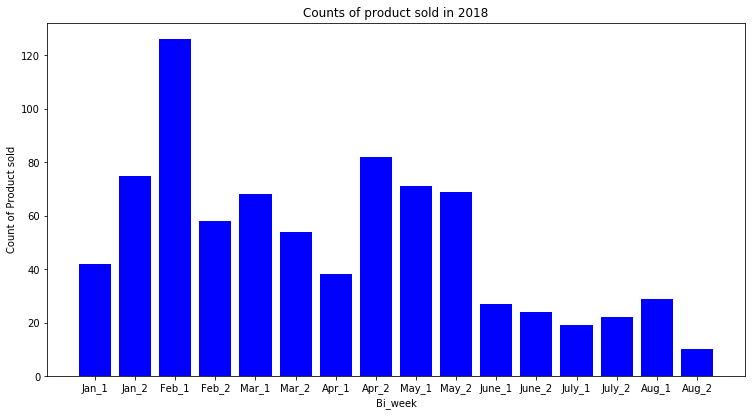

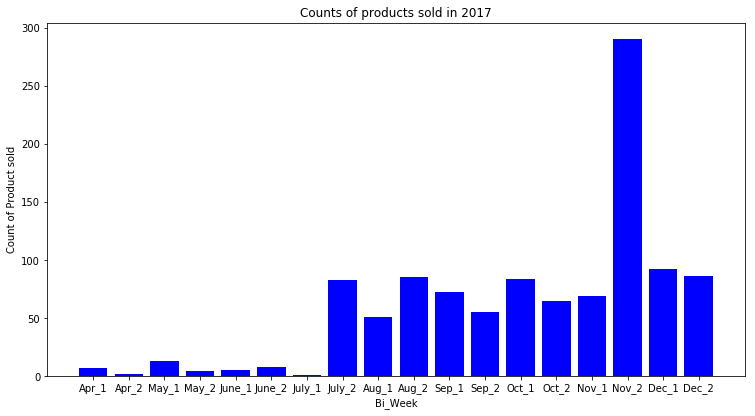

In [50]:
seller_biweekly_transaction_count('1f50f920176fa81dab994f9023523100','garden_tools')

Monthly seller count for the particular seller:
   product_category_name_english  transaction_year  transaction_month  count
0                           baby              2018                  3      1
1                           baby              2018                  4     23
2                           baby              2018                  5      7
3                           baby              2018                  6      2
4                           baby              2018                  7      3
5                           baby              2018                  8      6
6                   garden_tools              2017                  4      9
7                   garden_tools              2017                  5     17
8                   garden_tools              2017                  6     13
9                   garden_tools              2017                  7     84
10                  garden_tools              2017                  8    136
11                  garden_t

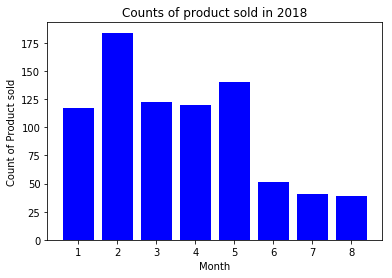

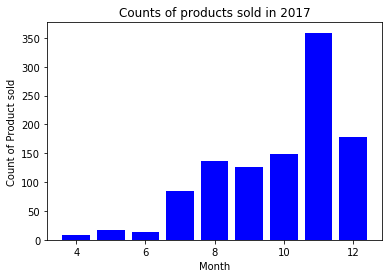

In [51]:
seller_monthly_transaction_count('1f50f920176fa81dab994f9023523100','garden_tools')

Monthly seller count for the particular seller:
   product_category_name_english  transaction_year  transaction_month  count
0                           baby              2018                  3      1
1                           baby              2018                  4     23
2                           baby              2018                  5      7
3                           baby              2018                  6      2
4                           baby              2018                  7      3
5                           baby              2018                  8      6
6                   garden_tools              2017                  4      9
7                   garden_tools              2017                  5     17
8                   garden_tools              2017                  6     13
9                   garden_tools              2017                  7     84
10                  garden_tools              2017                  8    136
11                  garden_t

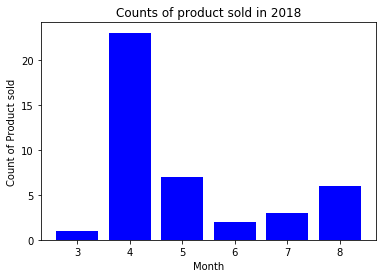

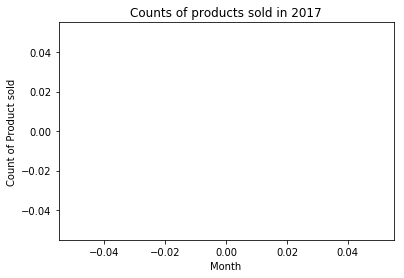

In [52]:
seller_monthly_transaction_count('1f50f920176fa81dab994f9023523100','baby')

In [53]:
def seller_biweekly_transaction_count_line_graph(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
    #print("Bi_weekly seller count for the particular seller:")
    print(seller_count)
    
    #graph for 2018
    
    bi_week = ['Jan_1_17','Jan_2_17','Feb_1_17','Feb_2_17','Mar_1_17','Mar_2_17','Apr_1_17','Apr_2_17','May_1_17','May_2_17','June_1_17','June_2_17','July_1_17','July_2_17','Aug_1_17','Aug_2_17','Sep_1_17','Sep_2_17','Oct_1_17','Oct_2_17','Nov_1_17','Nov_2_17','Dec_1_17','Dec_2_17','Jan_1_18','Jan_2_18','Feb_1_18','Feb_2_18','Mar_1_18','Mar_2_18','Apr_1_18','Apr_2_18','May_1_18','May_2_18','June_1_18','June_2_18','July_1_18','July_2_18','Aug_1_18','Aug_2_18','Sep_1_18','Sep_2_18','Oct_1_18','Oct_2_18','Nov_1_18','Nov_2_18','Dec_1_18','Dec_2_18']
    bi_weekly= 24*(seller_count[(seller_count['product_category_name_english']== product_category)]['transaction_year'] - 2017) + seller_count[(seller_count['product_category_name_english']== product_category)]['Bi-Weekly']
    count=(seller_count[seller_count['product_category_name_english']==product_category]['count'])
    
    print("bi_weekly: \n",bi_weekly)
    print("count:\n",count)
    
    plt.figure(dpi = 300)
    fig = plt.gcf()
    fig.set_size_inches(34.5, 12.5)
    x = bi_week[min(bi_weekly):max(bi_weekly) + 1]
    plt.plot(bi_week[min(bi_weekly):max(bi_weekly) + 1], np.log10(count), color="blue")
    #plt.savefig("eg.jpeg",dpi = 450)
    
    
    
    
    
    
    plt.figure(dpi = 300)
    fig = plt.gcf()
    fig.set_size_inches(34.5, 12.5)
    x = bi_week[min(bi_weekly):max(bi_weekly) + 1]
    plt.plot(bi_week[min(bi_weekly):max(bi_weekly) + 1],count, color="blue")
    #plt.savefig("eg.jpeg",dpi = 450)
    #img=mpimg.imread("eg.jpeg")
    #plt.imshow(img)
    #plt.title('Counts of product sold in 2018')
    #plt.xlabel('Bi_week')
    #plt.ylabel('Count of Product sold')
    #plt.imshow(im,cmap='Greys_r')
    
    #graph for 2017

    #seller_count=seller.groupby(['product_category_name_english','transaction_year','Bi-Weekly']).size().reset_index(name='count')
    #fig = plt.gcf()
    #fig.set_size_inches(12.5, 6.5)
    #bi_weekly=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']== product_category)]['Bi-Weekly'])
    #count=(seller_count[(seller_count['transaction_year']==2017) & (seller_count['product_category_name_english']==product_category)]['count'])
    
    #plt.plot(bi_week[min(bi_weekly):max(bi_weekly) + 1], count, color="blue")
    ##plt.title('Counts of products sold in 2017')
    #plt.xlabel('Bi_Week')
    #plt.ylabel('Count of Product sold')
    #plt.show()

   product_category_name_english  transaction_year  Bi-Weekly  count
0                           baby              2018          5      1
1                           baby              2018          6      3
2                           baby              2018          7     20
3                           baby              2018          8      4
4                           baby              2018          9      3
5                           baby              2018         10      1
6                           baby              2018         11      1
7                           baby              2018         13      3
8                           baby              2018         14      3
9                           baby              2018         15      3
10                  garden_tools              2017          6      7
11                  garden_tools              2017          7      2
12                  garden_tools              2017          8     13
13                  garden_tools  

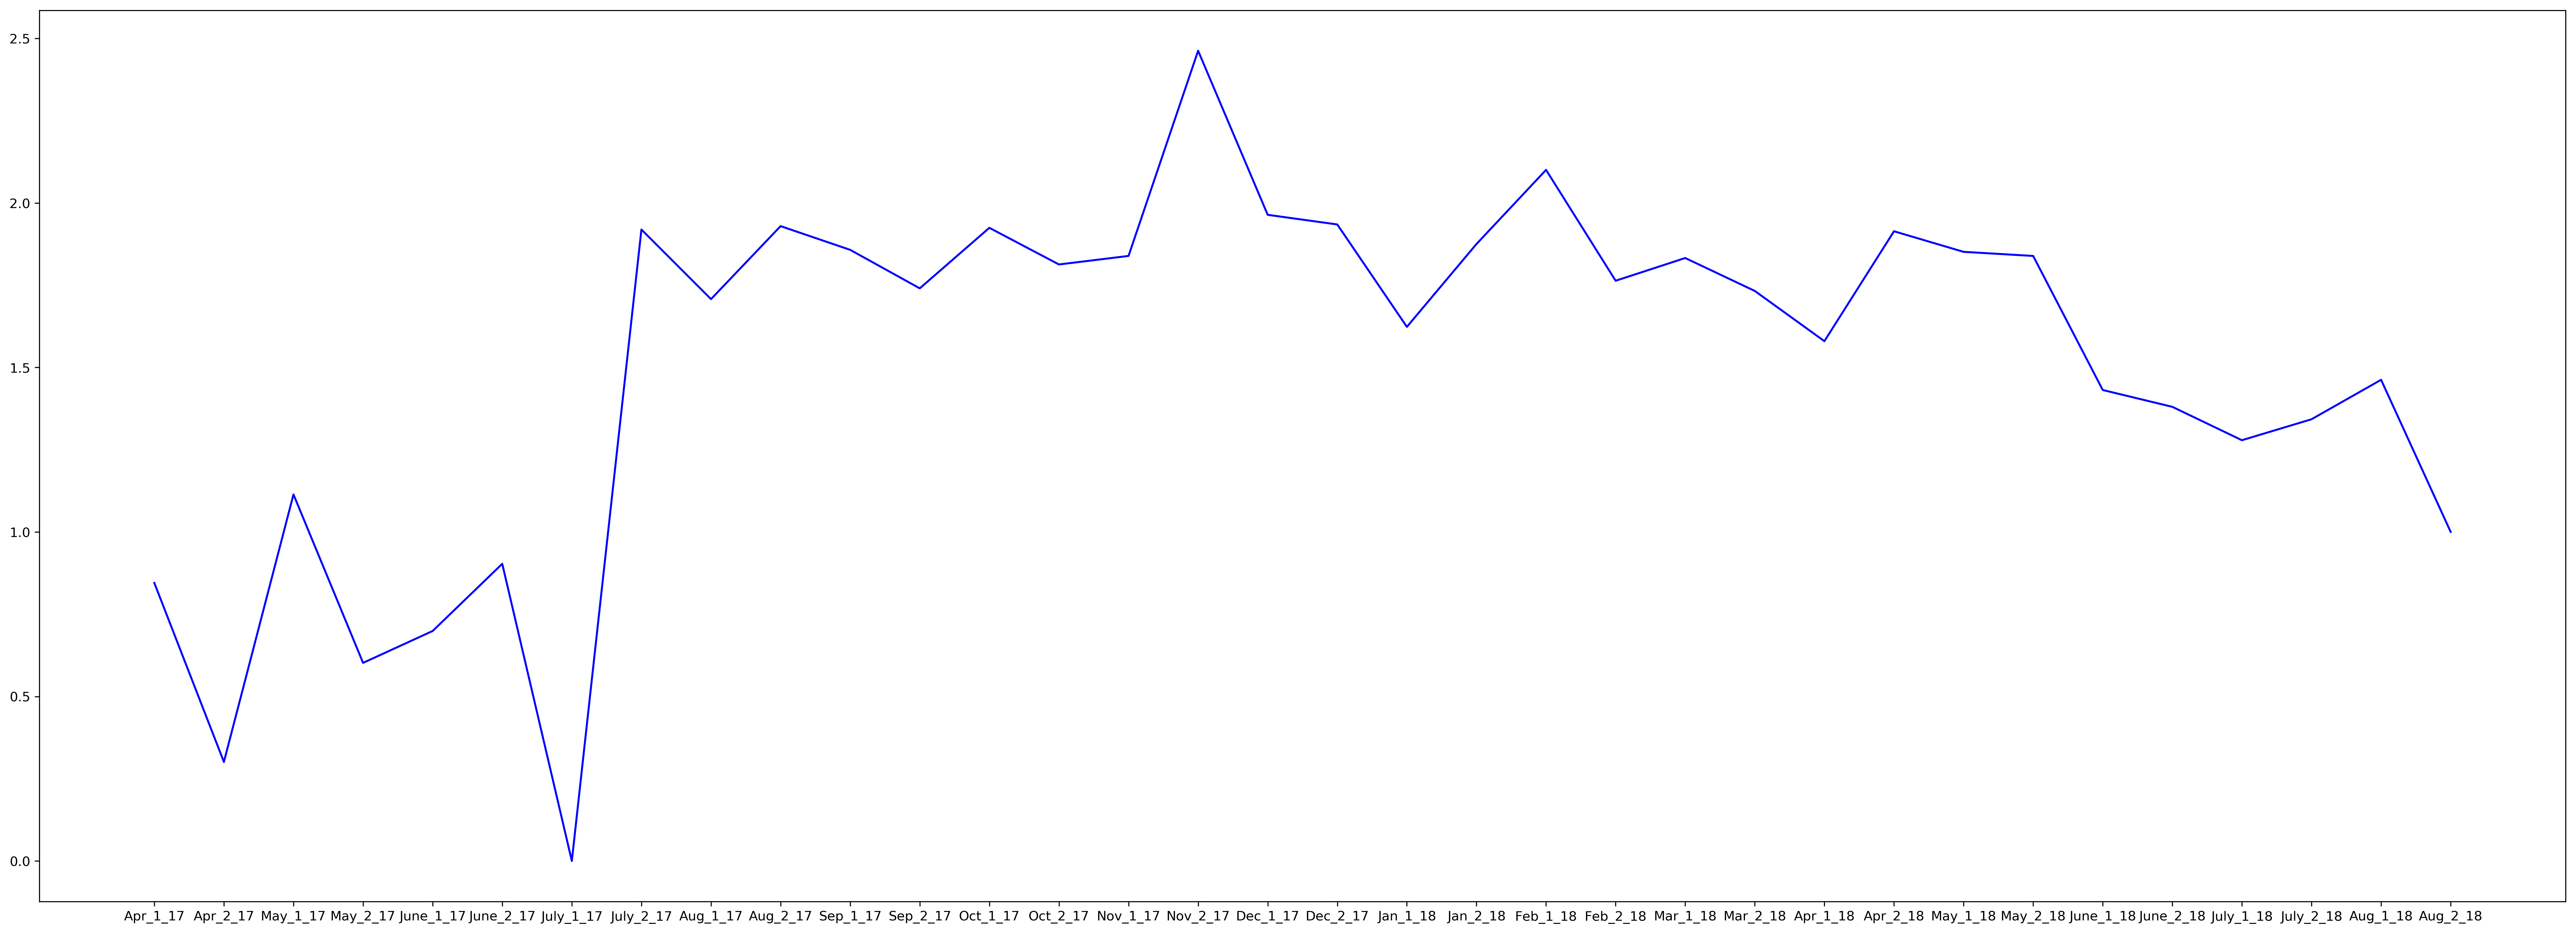

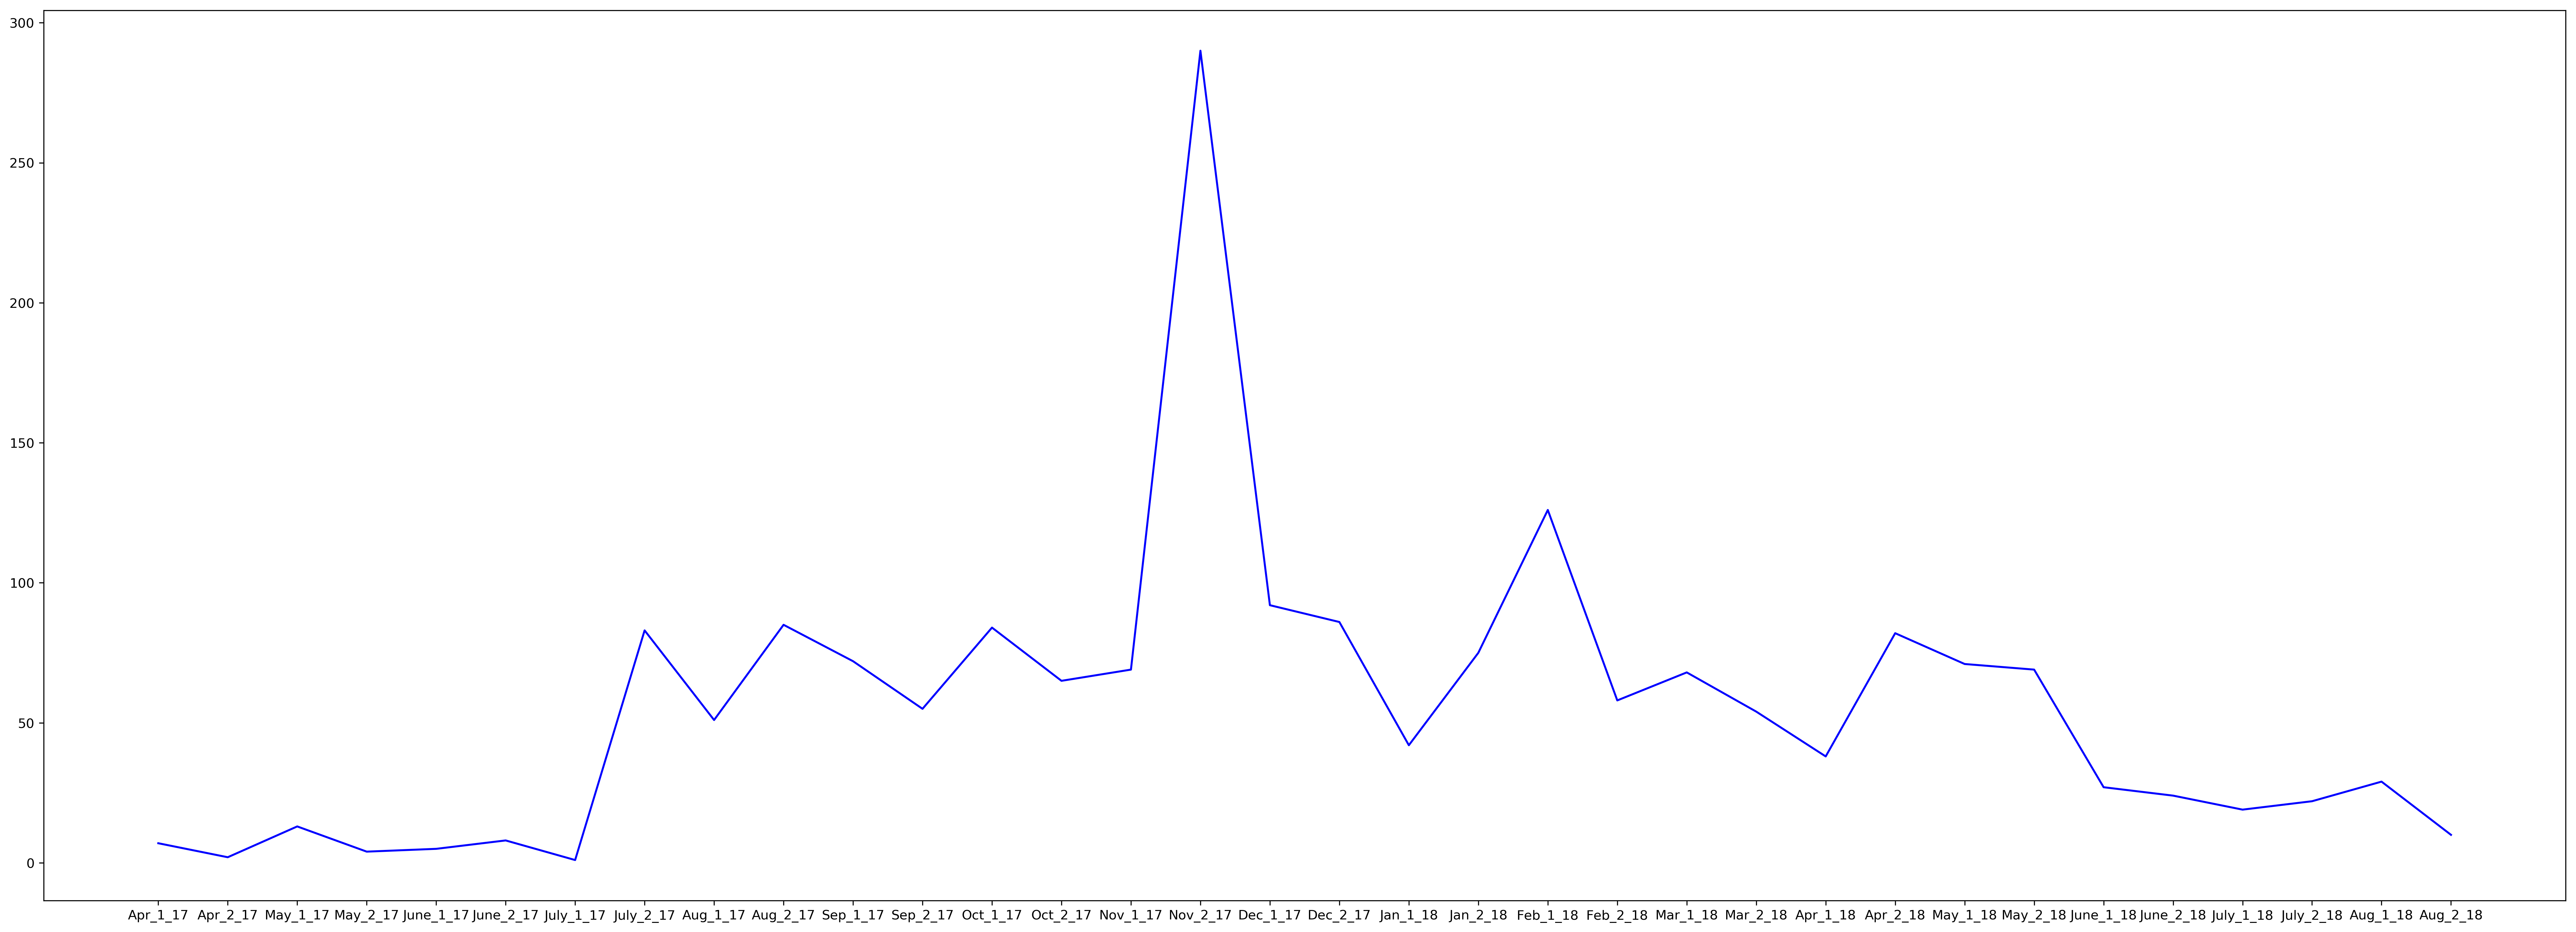

In [54]:
seller_biweekly_transaction_count_line_graph('1f50f920176fa81dab994f9023523100','garden_tools')

In [55]:
def seller_monthly_transaction_count_line_graph(seller_id,product_category):
    seller = data_new[(data_new['seller_id']==seller_id)]
    seller_count = seller.groupby(['product_category_name_english','transaction_year','transaction_month']).size().reset_index(name='count')
    print("Monthly seller count for the particular seller:")
    print(seller_count)
    
    #graph for 2018

    month_year=seller_count[seller_count['product_category_name_english']== product_category]['transaction_year'].astype(str) +"_" + seller_count[(seller_count['product_category_name_english']== product_category)]['transaction_month'].astype(str)
    count=(seller_count[seller_count['product_category_name_english']==product_category]['count'])
    
    fig = plt.gcf()
    fig.set_size_inches(16.5, 6.5)
    
    plt.plot(month_year, count, color="blue")
    plt.title('Counts of product sold in 2018')
    plt.xlabel('Month and Year')
    plt.ylabel('Count of Product sold')
    plt.show()
    
    fig = plt.gcf()
    fig.set_size_inches(16.5, 6.5)
    
    plt.plot(month_year,np.log(count), color="blue")
    plt.title('Counts of product sold in 2018')
    plt.xlabel('Month and Year')
    plt.ylabel('log(Count) of Product sold')
    plt.show()

Monthly seller count for the particular seller:
   product_category_name_english  transaction_year  transaction_month  count
0                           baby              2018                  3      1
1                           baby              2018                  4     23
2                           baby              2018                  5      7
3                           baby              2018                  6      2
4                           baby              2018                  7      3
5                           baby              2018                  8      6
6                   garden_tools              2017                  4      9
7                   garden_tools              2017                  5     17
8                   garden_tools              2017                  6     13
9                   garden_tools              2017                  7     84
10                  garden_tools              2017                  8    136
11                  garden_t

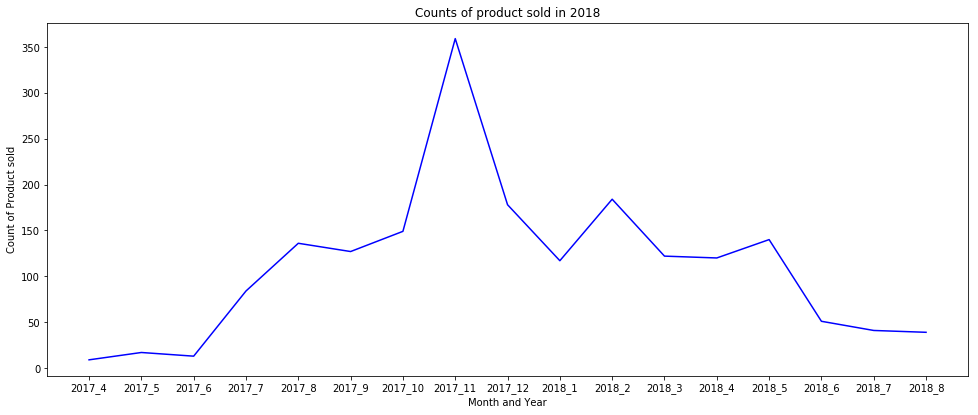

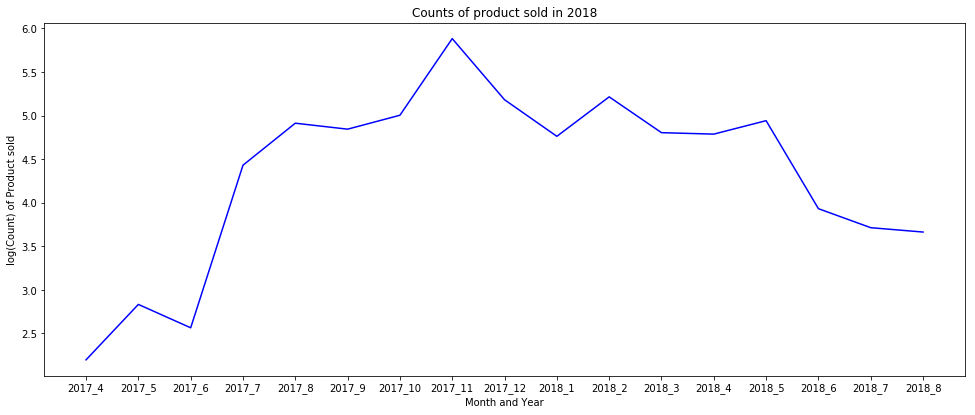

In [56]:
seller_monthly_transaction_count_line_graph('1f50f920176fa81dab994f9023523100','garden_tools')